# A Machine Learning Approachfor Detecting Closet Index Trackers

### Author: Fabrizio Basso
### Student ID: 10512476
### Emails: 10512476@mydbs.ie; fabrbasso@gmail.com

### 1. Introduction: Regulatory Background<a id="background"></a>

This section aims to provide a general overview on how the regulators have so far tackled the Index Hugging issue with a special attention to the Irish case.

#### 1.1 Europe Goes on War to Closet Index Tracking

The European Securities and Markets Authority (ESMA)'s publication on February the 2nd, 2016, titled ['Supervisory work on potential closet index tracking'](https://www.esma.europa.eu/sites/default/files/library/2016-165_public_statement_-_supervisory_work_on_potential_closet_index_tracking.pdf), brought up the issue of the closet index tracking to the attention of the financial industry. By closet indexing, ESMA defines the practice by which a UCITS while identifying its investment strategy as active in their documentation to the public, in fact, implements a passive investment strategy. At the same time, the 'phoney active fund' charges management fees in line with those of actively managed funds. ESMA's report concluded that between 5\% to 15\% of the funds "could be closet trackers". Spurred by ESMA's publication, national financial watchdogs and regulatory authorities started to test, probe and verify the investment strategies of the entities under their supervision. As a result of these inquiries, a number Consultation Papers, Guidance, Guidelines and Policy Statements have been issued Europe-wide. In Ireland, for instance, the Central Bank (CBI) issued an ['Industry Letter' on the 'Thematic Review of Closet Indexing'] (https://www.centralbank.ie/docs/default-source/regulation/industry-market-sectors/funds/industry-communications/industry-letter---thematic-review-of-closet-indexing.pdf?sfvrsn=4), where it shortlisted a total of 182 funds, out of 2550 analysed, for further review for potential closet index tracking practice. In the UK, as a result of its studies, the FCA issued the [Policy Statement 19/4](https://www.fca.org.uk/publication/policy/ps19-04.pdf) significantly increasing the transparency whereby the management of existing funds is described to investors. The fallouts for a fund falling under the watchdog scrutiny for closet indexing can be on two counts:

* __Reputational__: In UK some Asset Management companies have been forced to re-issue their marketing material and notify the investors that the Fund was passively replicating an index; and
* __Monetary__: Again, in the UK, 64 funds had to compensate investors a total of £34m, while in Norway, one of the leading national asset management had to refund investors for NKr345m.

#### 1.2 CBI's Analysis and Methodology

The CBI in its review of the fund industry on closet indexing analyzed as many as 2'550 Irish authorized UCITS funds classified as active, for a total of 15'500 share classes. Each share class was analyzed against a pool of 2'500 indices using a set of statics. As a result of this study, the Central Bank shortlisted 182 funds for further review or 7.1\% of the sample. In its analysis, the CBI used the following metrics to identify Closet Indexing funds:

* __TEV__: The Tracking Error Volatility (TEV) measures as the standard deviation of the difference of the index and fund daily returns. The lower this metric is the closer the fund returns are to those of the index;
* __Beta__: Beta is calculated as the coefficient of a linear regression of a fund's returns on an index returns. The closer this metric is to one the more similar the fund is to the benchmark;
* __R2__: another byproduct of the linear regression performed to calculate the Beta statistics, the \(R^{2}\) measures the proportion of the variation of the fund explained by the index. 


In addition to the metrics mentioned above, in the CBI's Letter to the Industry, there are five further elements of great importance. Three of these elements are additional information: 

1. __Not the Benchmark only__: When evaluating if a fund is active or passive, the CBI did not limit the analysis to a fund's disclosed benchmark, but it considered a wider universe made of 2'500 indices; 
2. __Values for Money__: The CBI gave great emphasis to the fact that a management style of a fund must be aligned with its fees structure. If a fund has a passive management style, but its fees are in line with those of declared passive funds this is not a reason for concern for the CBI; and
3. __Ongoing Concern__: The Central Bank made stated very clearly that the Closet Indexing analysis is not a one-off exercise. It should be an ongoing control and examination about a fund's management style and what has been promised to the investors and the fees charged on them.  
\end{itemize}

The remaining two relevant elements are the "untold" details. In presenting its analysis, the CBI omitted, on purpose, to disclose the following pivotal information:

1. __Analysis Timeframe__: There is no reference on the time horizon used for the analysis; and
2. __Metrics Thresholds__: The metrics used are known, but the significant levels after which a fund is flagged as a closet tracker are unknown.  

The lack of clarity around these elements created a grey area about which funds can or cannot be classified as a Closet Tracker. As a result, developing a proper methodology to review and monitor funds performances against the Closet index tracking practice is of paramount importance in the industry.


### 2. How to Track a Tracker: the Methodology<a id="method"></a>

The diagram on the next page outlines the methodology used to detect closet tracker funds.  This paper considers a 1-Year timeframe. However, this approach can be replicated over any desired time period. There are five critical steps in the procedure: 

1. The starting point is the basket of __funds branding themselves as actively managed but whose real nature is unknown__ (Box n.1, where each square represents a fund). Among these funds, some are passively tracking an index (represented by the stricken-out squares in grey). These are the fund that this process aims to identify.
2. The second set of funds is introduced (Box n.2), The fund from this lot are all __passively managed, and their nature is well-known__. For instance, they are ETFs aiming at tracking an underlying declared benchmark/index. 
3. These two baskets of funds are merged (Box n.3). The resulting set is composed by three main groups of funds: (1) Active Funds -from box n.1- whose nature is __unknown__; (2) Passive Funds -from box n.1- whose nature is __unknown__ and (3) Passive Funds -from box n.2- whose nature is __known__. At this stage, for each fund, the set of statistics used by the CBI to describe a fund's management style are computed against a wide selection of indices. Following the CBI's approach, this basket of indices also includes, but it is not limited to, the funds and the ETFs benchmarks.    
4. The style descriptive statistics are then used to train an unsupervised Machine Learning algorithm performing a clustering analysis on the dataset (Box n.4). In this framework, unsupervised learning has to be used as the funds from Box n.1 has no labels while those from Box n.2 all share the same label. As a result, the funds are grouped by management styles according to their style metrics.

The funds from Box n.1 grouped with the passive funds are further analyzed to assess their real nature and to verify if their fees structure is consistent with their management style. 

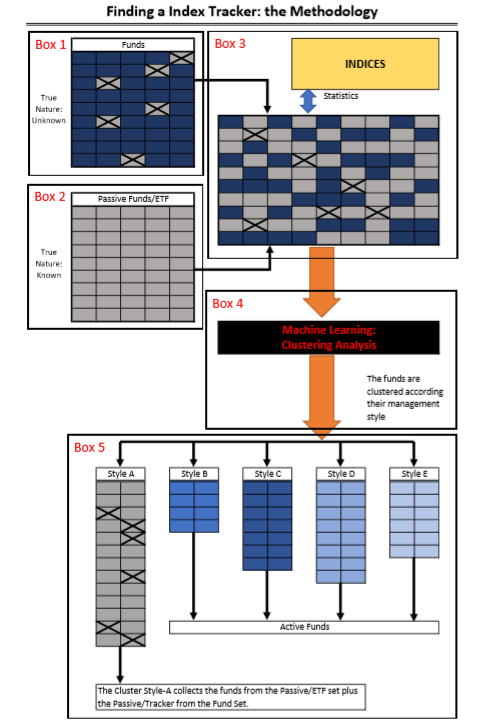

It should be clear that the approach used in this paper differs from the one used from the CBI to the extent that no specific threshold is set to divide the active funds from the closet trackers. Rather than making assumptions about the limits used by the regulator, this process tries to identify the passive funds branded as active, relying on the similarities they have with declared passive funds.

### 3. The Code<a id="code"></a>

#### 3.a Import Basic Libraries and set-up drives (Colab Only)

The only non-standard library used is mglearn. It is used to produce graphs later on in the analysis. If not installed please remove the "#" from the command line:__!pip install mglearn__

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/"
base_dir = 'CSV Files/'

In [2]:
import pandas as pd
import numpy as np
import collections as coll
#import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#!pip install mglearn
import mglearn

sns.set_style("whitegrid",{"grid.linestyle":'--'})

C:\Users\fabrizioxueling\Anaconda3\envs\tensorflow2_env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\fabrizioxueling\Anaconda3\envs\tensorflow2_env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# SciKitLearn imports:
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import (QuantileTransformer, StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer)
from sklearn.cluster import AgglomerativeClustering, KMeans, MeanShift, AffinityPropagation, SpectralClustering, DBSCAN
from sklearn.decomposition import PCA, FactorAnalysis, TruncatedSVD, KernelPCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS, Isomap, SpectralEmbedding
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, silhouette_score

#### 3.b Define a set of Function used later on in the analysis

These function are mostly used for graphic purposes:

In [4]:
from matplotlib.colors import LogNorm

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k', ax=None):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True, ax=None):
    plt.gray()
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    ax.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    ax.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_,ax=ax)

    ax.set_xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        ax.set_ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        ax.tick_params(labelleft=False)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)       
        
def plot_clusterer_comparison(clusterer1, clusterer2, X_0, X_1, title1=None, title2=None):
    clusterer1.fit(X_0)
    clusterer2.fit(X_1)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X_0[:,0:2])
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X_1[:,0:2], show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14) 
        
        
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

### 3.1 The Dataset

The starting dataset used for the analysis is made up of three main groups of data. All the time series consist of daily observations starting as far as the 1\textsuperscript{st} of January 2010, or a later date if they were not available at that time. The three baskets of data are the following:


1. __Funds__: This is a set of 40 Euro-denominated funds belonging to the Morningstar category investing in "European Large Cap Equity". Each fund is identified by its Bloomberg Code. These funds are either managed with reference to a Benchmark or are total return funds with no declared benchmark. In addition to the time series, the information set for each fund also covers the Bloomberg code of the relative Benchmark and the running management fees. At this stage nothing is known about the actual management style of these funds, a part being classified as active by Morningstar.
    

2. __Passive Funds/ETFs__: It is a collection of 59 Euro denominated ETFs having as a benchmark an European index of large-capitalisation companies. Each ETF is identified by its Bloomberg Code. In addition to the time series, the information set for each fund also covers the Bloomberg code of the relative tracked index and the running management __ETF_info__. During the analysis, the number of ETFs is reduced from 59 to 31. The reason behind this screening is that not all the ETFs experience the same level of liquidity: as an ETF reported closing price is the last traded contract, illiquid ETFs may display artificial divergences from their benchmark.
 

3. __Indices__: It is a collection of 89 Euro denominated large-capitalisation equity indices of European based companies. These indexes are calculated by several sources (Eurostoxx, Euronext, Bloomberg, S\&P, etc.) according to different aggregation methodologies (market capitalisation, active shares, volatility constrained, etc.) and coverage (in terms of size, sector, exclusion of specific companies or sectors, etc.). In this set are included all the funds and ETFs' benchmarks, and it is the set of indices used to assess the funds' management style.  

Some cells' code is specific for __Colab__, other for __Jupyter Notebook__, activate or deactivate them according to the platform you are running the code.

The first imported cvs files contains informations with relation to the funds, the indices used and the ETFs.

In [5]:
######## IMPORT LISTS - COLAB ##########

#fund_info = pd.read_csv(base_dir+'datasets/Fund_list.csv')
#index_info = pd.read_csv(base_dir+'datasets/Index_list.csv', names=['BLB Code'])
#etf_info = pd.read_csv(base_dir+'datasets/etf_list.csv')

# remove na id any
#fund_info[fund_info=='#N/A Field Not Applicable']=np.nan 
#fund_info.fillna('Total Return',inplace=True)

In [6]:
######## IMPORT LISTS - JUPYTER##########

fund_info = pd.read_csv('CSV Files/Fund_list.csv')
index_info = pd.read_csv('CSV Files/Index_list.csv', names=['BLB Code'])
etf_info = pd.read_csv('CSV Files/etf_list.csv')

# remove na if any
fund_info[fund_info=='#N/A Field Not Applicable']=np.nan 
fund_info.fillna('Total Return',inplace=True)

C:\Users\fabrizioxueling\Anaconda3\envs\tensorflow2_env\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
print(etf_info.shape)
etf_info.head(15)

(59, 6)


,Security,Description,Category,Subcategory,Benchmark,Fees
0,SX7EEX GY Equity,iShares EURO STOXX Banks 30-15 UCITS ETF DE (X...,Equities,Exchange Traded Products,SX7315T Index,0.51
1,FEZ US Equity,SPDR EURO STOXX 50 ETF (U.S.),Equities,Exchange Traded Products,SX5U Index,0.29
2,SX5EEX GY Equity,iShares Core EURO STOXX 50 UCITS ETF DE (Xetra),Equities,Exchange Traded Products,SX5T Index,0.10
3,MSE FP Equity,Lyxor EURO STOXX 50 DR UCITS ETF Class Dist (E...,Equities,Exchange Traded Products,SX5T Index,0.20
4,EUN2 GY Equity,iShares Core EURO STOXX 50 UCITS ETF EUR Dist ...,Equities,Exchange Traded Products,SX5T Index,0.10
5,BNKE FP Equity,Lyxor EURO STOXX Banks DR UCITS ETF Class Acc ...,Equities,Exchange Traded Products,SX7T Index,0.30
6,IDVY NA Equity,iShares Euro Dividend UCITS ETF Class EUR DIST...,Equities,Exchange Traded Products,SD3T Index,0.40
7,EUE IM Equity,iShares Core EURO STOXX 50 UCITS ETF EUR Dist ...,Equities,Exchange Traded Products,SX5T Index,0.10
8,XESC GY Equity,Xtrackers Euro Stoxx 50 UCITS ETF Class 1C (Xe...,Equities,Exchange Traded Products,SX5T Index,0.09
9,SD3EEX GY Equity,iShares EURO STOXX Select Dividend 30 UCITS ET...,Equities,Exchange Traded Products,SD3T Index,0.31


The cell below compares the fees stractures for ETFs (Passive Funds) and active funds. The latters on average have higher fees.

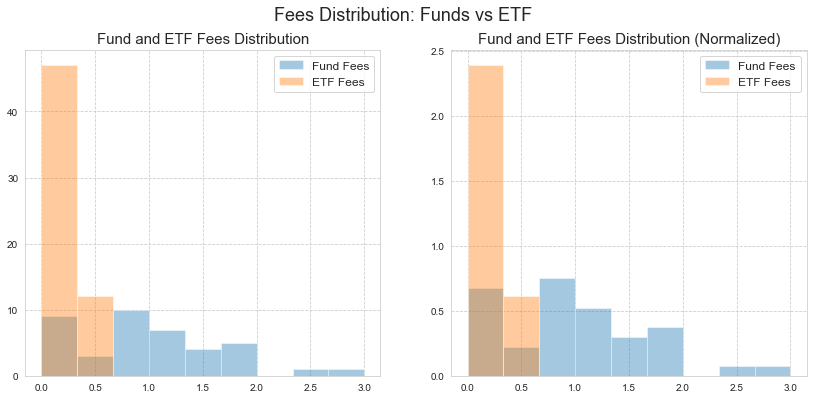

In [8]:
######## COMPARE FEES LEVEL ##########
# set bins
bins = np.linspace(0,3,10)
# Normalize
kwargs = dict(alpha=0.4, bins=bins, density=False, stacked=True)
kwargs1 = dict(alpha=0.4, bins=bins, density=True, stacked=True)
fig, ax = plt.subplots(1, 2, figsize=(14,6))

#plt.figure(figsize=(15,2))
ax[0].hist(fund_info['Fees'], **kwargs, label='Fund Fees', ) #color = 'royalblue'
ax[0].hist(etf_info['Fees'], **kwargs, label='ETF Fees', ) #color = 'red'
ax[0].legend(loc='upper right', fontsize = 12)
ax[0].grid(linestyle='--')
ax[0].set_title('Fund and ETF Fees Distribution', fontdict = {'fontsize':15})

ax[1].hist(fund_info['Fees'], **kwargs1, label='Fund Fees', ) #color = 'royalblue'
ax[1].hist(etf_info['Fees'], **kwargs1, label='ETF Fees', ) #color = 'red'
ax[1].legend(loc='upper right', fontsize = 12)
ax[1].grid(linestyle='--')
ax[1].set_title('Fund and ETF Fees Distribution (Normalized)', fontdict = {'fontsize':15})

plt.suptitle('Fees Distribution: Funds vs ETF',fontsize=18)
plt.savefig('Fees_comp1.png',dpi=75,bbox_inches='tight')
plt.show()

Import the datasets with the time series for funds, indices, etfs and benchmarks

In [9]:
######## IMPORT DATASETS - COLAB ##########
#dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

#funds = pd.read_csv(base_dir+'datasets/funds_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
#indices = pd.read_csv(base_dir+'datasets/index_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
#etfs = pd.read_csv(base_dir+'datasets/etf_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
#funds_bench = pd.read_csv(base_dir+'datasets/funds_bench_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
#etf_bench = pd.read_csv(base_dir+'datasets/etf_bench_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
#indices_sp = pd.read_csv(base_dir+'datasets/aggregate.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse) 
#indices_sector = pd.read_csv(base_dir+'datasets/sector_timeseries_eu.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse) 

In [10]:
######## IMPORT DATASETS - JUPYTER ##########
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

funds = pd.read_csv('CSV Files/funds_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
indices = pd.read_csv('CSV Files/index_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
etfs = pd.read_csv('CSV Files/etf_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
funds_bench = pd.read_csv('CSV Files/funds_bench_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
etf_bench = pd.read_csv('CSV Files/etf_bench_timeseries.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse)
indices_sp = pd.read_csv('CSV Files/aggregate.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse) 
indices_sector = pd.read_csv('CSV Files/sector_timeseries_eu.csv', index_col='Dates', parse_dates=['Dates'], date_parser=dateparse) 

Quick check on the datasets' shapes and entries with Head and Tails Functions:

In [11]:
print('Fund Shape:', funds.shape)
print('Indices Shape:', indices.shape)
print('etfs Shape:', etfs.shape)
print('Fund_bench Shape:', funds_bench.shape)
print('etfs_bench Shape:', etf_bench.shape)
print('indices_sp Shape:', indices_sp.shape)
print('indices_sector Shape:', indices_sector.shape)

Fund Shape: (2371, 40)
Indices Shape: (2583, 30)
etfs Shape: (2583, 59)
Fund_bench Shape: (2584, 17)
etfs_bench Shape: (2583, 29)
indices_sp Shape: (2586, 7)
indices_sector Shape: (2584, 11)


In [12]:
etf_bench.head()

,SX7315T Index,SX5U Index,SX5T Index,SX7T Index,SD3T Index,MSDEEMUN Index,SXXT Index,SX7315T Index.1,SX5TL Index,SXO7T Index,...,SX5DU Index,SLGT Index,SCXU Index,SX5E Index,SX5EDHB Index,SX5EL Index,SX5EDFT Index,SX5HUN Index,SX5EDCHD Index,SXKP Index
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,87.74,5033.61,4697.61,377.68,2587.72,113.940,425.80,87.74,4539.27,NaN,...,134.81,1297.74,265.33,2964.96,139.66,1810.08,991.51,94.90,119.74,261.17
2010-01-04,89.55,5155.80,4781.32,385.51,2648.84,115.954,433.53,89.55,4700.88,NaN,...,137.23,1314.54,273.26,3017.80,142.17,1872.88,997.53,96.60,121.87,263.63
2010-01-05,90.39,5138.68,4772.71,389.11,2669.41,116.100,434.19,90.39,4683.91,NaN,...,136.99,1310.61,275.55,3012.36,141.91,1866.11,1015.63,96.42,121.64,263.15
2010-01-06,90.84,5123.75,4768.44,391.06,2676.91,116.220,434.70,90.84,4675.49,NaN,...,136.86,1314.41,276.39,3009.66,141.78,1862.75,1017.75,96.33,121.54,261.85
2010-01-07,91.46,5098.08,4764.75,393.72,2675.50,116.163,434.61,91.46,4668.21,NaN,...,136.76,1311.79,276.98,3007.34,141.67,1859.86,1023.73,96.25,121.45,257.75


In [13]:
funds_bench.tail()

,NDDLE15 Index,SX5T Index,STGPREZU Index,MXEU Index,SXXT Index,M7EM Index,MXEM Index,NE700862 Index,MSDEEMUN Index,NDDLEMU Index,DJST Index,SX5E Index,MSDUEMU Index,FTAW12 Index,LCXE Index,M1EU Index,MSDEE15N Index
Dates,,,,,,,,,,,,,,,,,
2019-11-21,6593.564,7804.66,236.58,135.20,795.61,211.25,129.4354,1470.27,211.246,386.610,3679.66,3679.66,201.032,270.48,400.89,6852.22,236.092
2019-11-22,6628.369,7820.90,236.04,135.82,797.52,211.83,129.7940,1474.66,211.831,387.664,3687.32,3687.32,200.815,270.27,401.81,6857.17,237.172
2019-11-25,6682.026,7864.09,237.48,137.20,802.38,213.16,130.6011,1481.55,213.163,390.093,3707.68,3707.68,201.671,271.63,404.13,6913.69,239.594
2019-11-26,6694.319,7859.57,238.68,137.26,803.88,213.53,130.8257,1484.11,213.532,390.771,3705.55,3705.55,202.063,272.16,404.45,6918.49,239.706
2019-11-27,6694.319,7873.93,238.68,137.26,803.88,213.53,130.8257,1484.11,213.532,390.771,3712.32,3712.32,202.063,272.38,405.14,6918.49,239.706


Check for the presence and then removing any Duplicates among the indeces, the ETFs and the Funds and remove them:

In [14]:
# Spot duplicates:
from_etfbench = list(set(list(etf_bench.columns)) & set(list(funds_bench.columns)))
from_indices = list(set(list(etf_bench.columns)) & set(list(indices.columns)))
from_etf = list(set(list(funds.columns)) & set(list(etfs.columns)))
# Remove duplicates:
etf_bench.drop(from_etfbench, inplace=True, axis=1)
indices.drop(from_indices, inplace=True, axis=1)
etfs.drop(from_etf, inplace=True, axis=1)

Create a set of Relevant Lists: These lists are used later on to create DataFrames or to iterate:

In [15]:
# Funds and Etfs lists
funds_list = list(funds.columns)
etfs_list = list(etfs.columns)
# aggregate
funds_etfs = funds_list + etfs_list

# Indices lists
indeces_list = list(indices.columns)
fundbench_list = list(funds_bench.columns)
etfbench_list = list(etf_bench.columns)
spindex_list = list(indices_sp.columns)
sectorindex_list = list(indices_sector.columns)
# aggregate
tot_indices_list = indeces_list + fundbench_list + etfbench_list + spindex_list + sectorindex_list

# Print results:
print('Overall, {} Funds -{}- or Etf -{}- are tested against {} indeces'.format(len(funds_etfs),
                                                                                len(funds_list),
                                                                                len(etfs_list),
                                                                                len(tot_indices_list)))

Overall, 98 Funds -40- or Etf -58- are tested against 89 indeces


#### Merge all the dataset in to a single DataFrame :

In [16]:
df_main = pd.concat([funds, indices,etfs,funds_bench,etf_bench,indices_sp,indices_sector], axis=1).reindex(funds.index)

In [17]:
# Check for duplicates:
print('Shape of the dataset: {};\nDuplicate Indeces: {}'.format(df_main.shape,[item for item, count in coll.Counter(list(df_main.columns)).items() if count > 1]))

Shape of the dataset: (2371, 187);
Duplicate Indeces: []


In [18]:
#df_main.iloc[:,:90].info()

In [19]:
#df_main.iloc[:,90:].info()

Calculate 1 day percentage change: Percent change of the features is used in the regression estimation

In [20]:
# 1 day pct chenge:
df_main_d = df_main.pct_change()[1:]
df_main_d.head()

,ACMESIE LX Equity,RCMSTYL LX Equity,ALEPTEU LX Equity,AEEI2EC LX Equity,CAIXEIA LX Equity,AXWEOFC LX Equity,AXWECEI LX Equity,MEREMAI LX Equity,ETDD FP Equity,CSEMICE LX Equity,...,S5HLTH Index,S5FINL Index,S5TELS Index,S5COND Index,S5INDU Index,S5CONS Index,S5ENRS Index,S5UTIL Index,S5RLST Index,S5MATR Index
Dates,,,,,,,,,,,,,,,,,,,,,
2010-10-26,-0.005882,-0.009504,NaN,-0.004158,-0.001856,-0.002497,-0.002526,-0.012805,NaN,NaN,...,-0.003050,0.001277,0.000906,0.003916,-0.002597,-0.003599,0.002610,-0.001798,-0.006837,-0.002266
2010-10-27,-0.004602,-0.003198,NaN,-0.006263,-0.007244,-0.006600,-0.007226,0.001235,NaN,NaN,...,-0.005043,0.000918,-0.004115,-0.004861,-0.006741,-0.004827,-0.006036,-0.004534,-0.009179,-0.008529
2010-10-28,0.004624,0.001070,NaN,0.002101,0.004143,0.004582,0.005703,-0.003085,NaN,NaN,...,0.004681,-0.000459,0.002644,0.003967,-0.003160,0.003392,-0.000271,0.001747,-0.006004,-0.001122
2010-10-29,-0.002630,-0.005342,NaN,-0.002096,0.000396,0.000000,-0.000746,-0.002475,NaN,NaN,...,-0.004715,-0.001631,0.000577,-0.001222,0.000756,0.001893,-0.000565,0.001806,0.002330,0.008659
2010-11-01,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.001717,-0.000153,0.003460,-0.000245,0.000900,-0.000810,0.002892,-0.008517,0.012139,0.000000


In [21]:
df_main_d.describe().T[:25]

,count,mean,std,min,25%,50%,75%,max
ACMESIE LX Equity,2370.0,0.000356,0.011553,-0.059424,-0.005042,0.000000,0.006124,0.064044
RCMSTYL LX Equity,2370.0,0.000179,0.011615,-0.071151,-0.004984,0.000791,0.006048,0.051128
ALEPTEU LX Equity,1114.0,0.000252,0.009209,-0.051451,-0.004214,0.000441,0.005295,0.037262
AEEI2EC LX Equity,2370.0,0.000368,0.010904,-0.061761,-0.004959,0.000000,0.006048,0.051919
CAIXEIA LX Equity,2370.0,0.000327,0.009643,-0.054484,-0.004169,0.000268,0.005089,0.043500
AXWEOFC LX Equity,2370.0,0.000328,0.009685,-0.062500,-0.004222,0.000150,0.005189,0.044610
AXWECEI LX Equity,2370.0,0.000347,0.010859,-0.058467,-0.004633,0.000182,0.005938,0.055161
MEREMAI LX Equity,2370.0,0.000324,0.010918,-0.081832,-0.005313,0.000383,0.006055,0.063253
ETDD FP Equity,1130.0,0.000189,0.010459,-0.086241,-0.004507,0.000356,0.005409,0.047732
CSEMICE LX Equity,1018.0,0.000341,0.008932,-0.056305,-0.003793,0.000343,0.004897,0.036410


### 3.2 Funds and ETFs: Calculating the Statistics Set<a id="stats"></a>

As explained in paragraph 2, the Funds and ETFs datasets are merged, and their daily returns are compared against those from the Indices set. To characterise a fund management style, this paper employs the same metrics outlined in the CBI document. As a result, linear regressions are estimated on the returns of each fund against the indices returns taken one-by-one. The timeframe used for the analysis is one year.
After each regression is fitted, the __Beta__ and the __R2__ are stored in a cross-sectional table,  with the Funds/ETFs on the columns while the Indices are on the rows. As for the Beta metric, since the scope is to measure how much different it is from 1, its value is transformed as follow:
\begin{equation}\label{eq:3}
\hat{\beta^{T}} = \left|\hat{\beta}-1\right|
\end{equation}
The __TEV__ is calculated as the standard deviation of the difference between a fund and an Index's returns. Again the results are stored in a cross-section table.
As a result of this step, three cross-section matrices are produced describing the investment style of each fund against every index in the dataset. The following tables reproduce for each of the three features, the first five rows and ten columns:

#### Create a dataset to store the results for each feature

In [22]:
# DataFrames for 6m - 125 days - analysis
time_6m = 125

r2_df_6m = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
beta_df_6m = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
tev_df_6m = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
ks_df_6m = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)

# DataFrames for 1y - 250 days - analysis
time_1y = 250

r2_df_1y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
beta_df_1y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
tev_df_1y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
ks_df_1y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)

# DataFrames for 2y - 500 days - analysis
time_2y = 500

r2_df_2y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
beta_df_2y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
tev_df_2y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)
ks_df_2y = pd.DataFrame(index=tot_indices_list, columns=funds_etfs)

#### **1-Year analysis:**

In this cell by using the Scikitlearn Regression Function the Beta and the R2 of the regression are computed. Then the TEV of the funds and ETFS with the set of set of indeces is calculated. All the results are stored in a Dataframe.

In [23]:
%%time
#Initialize regression
reg = LinearRegression(n_jobs=-1)

for a , b in r2_df_1y.iteritems():
    for i in b.index:
      # Select the time series:
      X_data = df_main_d.loc[:,[a, i]][-time_1y:].dropna()
      # Fit regression 
      reg.fit(X_data.iloc[:,1].values.reshape(-1, 1),X_data.iloc[:,0].values.reshape(-1, 1),)
      # store Beta and R2
      r2_df_1y.loc[i,a] = reg.score(X_data.iloc[:,1].values.reshape(-1, 1),X_data.iloc[:,0].values.reshape(-1, 1))
      beta_df_1y.loc[i,a] = reg.coef_[0][0]
      # Store the TEV
      diff_perf = (X_data.iloc[:,1]-X_data.iloc[:,0])
      TEV = np.std(diff_perf)
      tev_df_1y.loc[i,a] = TEV*100
      # Store the Kolmogorov-Smirnov statistic
      ks_df_1y.loc[i,a] = stats.ks_2samp(X_data.iloc[:,1],X_data.iloc[:,0])[1]

Wall time: 2min 39s


#### __2-Years Analysis__: 
Same as above but usning a 2-Years window:

In [24]:
%%time
#Initialize regression
reg = LinearRegression(n_jobs=-1)

for a , b in r2_df_2y.iteritems():
    for i in b.index:
      # Select the time series:
      X_data = df_main_d.loc[:,[a, i]][-time_2y:].dropna()
      # Fit regression 
      reg.fit(X_data.iloc[:,1].values.reshape(-1, 1),X_data.iloc[:,0].values.reshape(-1, 1),)
      # store Beta and R2
      r2_df_2y.loc[i,a] = reg.score(X_data.iloc[:,1].values.reshape(-1, 1),X_data.iloc[:,0].values.reshape(-1, 1))
      beta_df_2y.loc[i,a] = reg.coef_[0][0]
      # Store the TEV
      diff_perf = (X_data.iloc[:,1]-X_data.iloc[:,0])
      TEV = np.std(diff_perf)
      tev_df_2y.loc[i,a] = TEV*100
      # Store the Kolmogorov-Smirnov statistic
      ks_df_2y.loc[i,a] = stats.ks_2samp(X_data.iloc[:,1],X_data.iloc[:,0])[1]

Wall time: 2min 36s


Here the Betas in the cross section table are transformed as outlined above:

In [25]:
# Modify the Betas as the difference between the estimated beta and 1 n absolute terms:
beta_df_1y_m = abs(beta_df_1y-1)
beta_df_2y_m = abs(beta_df_2y-1)
print(beta_df_1y_m.shape)
tev_df_1y.head()

(89, 98)


,ACMESIE LX Equity,RCMSTYL LX Equity,ALEPTEU LX Equity,AEEI2EC LX Equity,CAIXEIA LX Equity,AXWEOFC LX Equity,AXWECEI LX Equity,MEREMAI LX Equity,ETDD FP Equity,CSEMICE LX Equity,...,FEZ UP Equity,S7XE GR Equity,ISX5 LN Equity,SUBEEX GY Equity,VX5E LN Equity,50E FP Equity,SX5EEX GT Equity,ZPRL GY Equity,E50EUA GR Equity,XD5E GR Equity
BE500 Index,0.310681,0.664833,0.746074,0.318426,0.230213,0.255452,0.316619,0.426195,0.271811,0.301046,...,0.568543,1.18339,0.430884,0.284803,0.558205,0.270366,0.250549,0.303097,0.45921,0.43532
SX5P Index,0.384782,0.708278,0.795613,0.388111,0.272758,0.281524,0.386175,0.477354,0.323115,0.375882,...,0.599911,1.24695,0.48236,0.358484,0.555146,0.313762,0.294317,0.32332,0.485535,0.480411
SXXE Index,0.297718,0.710287,0.78486,0.284878,0.27169,0.280712,0.269784,0.460206,0.194616,0.260656,...,0.542289,1.13441,0.378288,0.220968,0.524247,0.212448,0.188838,0.373066,0.439132,0.42409
SXXP Index,0.322227,0.668792,0.749532,0.320725,0.218079,0.254881,0.324956,0.434144,0.280621,0.303613,...,0.577398,1.18644,0.43802,0.286752,0.574128,0.27298,0.252606,0.314691,0.470437,0.446439
EUETMP Index,0.705334,0.75745,0.822314,0.749048,0.680833,0.680396,0.756441,0.724112,0.765798,0.721757,...,0.781775,1.32906,0.778866,0.734559,0.858256,0.722329,0.754907,0.65158,0.769233,0.726574


#### Working on the 1-Year results:

Working on the 1-year results, this step aims to find out for each fund the index that best describes its returns in each metric considered. For instance, when the fund ACMESIE LX is analysed according to the beta statistic, the index against which it scores the lowest value is selected and stored. The same procedure is followed for the TEV and the R2. The only difference is that for the R2 the index with the highest value is selected. For each fund, the respective benchmark is added to the list of chosen indices in this way. Eventually, the output is a cross-sectional matrix. Here, each fund is matched to a list of indices (max four) according to the unique values in the list. 

* Here for each metrics, the index the achieves the highes score for each fund is stored:

In [26]:
# Create a set of empty lists for analysis: 
result_beta_1y=[]
result_r2_1y=[]
result_tev_1y=[]
# Analyze the highest score for each cathegory to shortlist potential candidate as
# closet benchmarks:
for data in funds_etfs:
    test_beta_1y = beta_df_1y_m.loc[:,data].values
    test_r2_1y = r2_df_1y.loc[:,data].values
    test_tev_1y = tev_df_1y.loc[:,data].values

    # For each parameter identify the index closer to be the closet tracker:
    result_beta_1y.append(tot_indices_list[test_beta_1y.argmin()])
    result_r2_1y.append(tot_indices_list[test_r2_1y.argmax()])
    result_tev_1y.append(tot_indices_list[test_tev_1y.argmin()])

* The results are then stored in a dataframe:

In [27]:
pot_trackers_1y=pd.DataFrame(index=['Beta','R2','TEV'],columns=funds_etfs,
                          data=[result_beta_1y,result_r2_1y,result_tev_1y]).T
pot_trackers_1y.head(10)

,Beta,R2,TEV
ACMESIE LX Equity,NDDLE15 Index,NDDLEMU Index,NDDLEMU Index
RCMSTYL LX Equity,SX5EDFT Index,N150 Index,SX5EDFT Index
ALEPTEU LX Equity,SX5EDFT Index,N150 Index,SX5EDFT Index
AEEI2EC LX Equity,NDDLEMU Index,S&P_Euro_75,S&P_Euro_75
CAIXEIA LX Equity,NDDLE15 Index,MSDEE15N Index,MSDEE15N Index
AXWEOFC LX Equity,NDDLE15 Index,MSDEE15N Index,MSDEE15N Index
AXWECEI LX Equity,MSER Index,SXXT Index,SXXT Index
MEREMAI LX Equity,NDDLE15 Index,S&P_EURO_PLUS,S&P_EURO_PLUS
ETDD FP Equity,DJST Index,SX5HUN Index,SX5HUN Index
CSEMICE LX Equity,FTEFC1 Index,NDDLEMU Index,NDDLEMU Index


* For each Funds or ETFs, their relative benchmark is added to the dataframe. The table reports a "Total Return" entry under the benchmark column when a fund has not declared benchmark: 

In [28]:
# make a copy of the results' dataframe:
verify_bench_1y=pot_trackers_1y.copy()

verify_bench_1y['Benchmark']=np.nan
# Add a column with the actual benchmark for each fund/etf:
for fund in funds_list:
  verify_bench_1y.loc[fund,'Benchmark'] = fund_info['Benchmark Code'][fund_info['Code']==fund].values[0]

for etf in etfs_list:
  verify_bench_1y.loc[etf,'Benchmark'] = etf_info['Benchmark'][etf_info['Security']==etf].values[0]

display(verify_bench_1y.head(10))
display(verify_bench_1y.tail(10))

,Beta,R2,TEV,Benchmark
ACMESIE LX Equity,NDDLE15 Index,NDDLEMU Index,NDDLEMU Index,NDDLE15 Index
RCMSTYL LX Equity,SX5EDFT Index,N150 Index,SX5EDFT Index,SX5T Index
ALEPTEU LX Equity,SX5EDFT Index,N150 Index,SX5EDFT Index,STGPREZU Index
AEEI2EC LX Equity,NDDLEMU Index,S&P_Euro_75,S&P_Euro_75,Total Return
CAIXEIA LX Equity,NDDLE15 Index,MSDEE15N Index,MSDEE15N Index,MXEU Index
AXWEOFC LX Equity,NDDLE15 Index,MSDEE15N Index,MSDEE15N Index,MXEU Index
AXWECEI LX Equity,MSER Index,SXXT Index,SXXT Index,SXXT Index
MEREMAI LX Equity,NDDLE15 Index,S&P_EURO_PLUS,S&P_EURO_PLUS,M7EM Index
ETDD FP Equity,DJST Index,SX5HUN Index,SX5HUN Index,SX5T Index
CSEMICE LX Equity,FTEFC1 Index,NDDLEMU Index,NDDLEMU Index,MXEM Index


,Beta,R2,TEV,Benchmark
FEZ UP Equity,SXLV1T Index,SX5U Index,SX5U Index,SX5U Index
S7XE GR Equity,SMI Index,SXO7T Index,SXO7T Index,SXO7T Index
ISX5 LN Equity,NE700862 Index,SX5U Index,SX5U Index,SX5T Index
SUBEEX GY Equity,MSER Index,DJSZXAET Index,DJSZXAET Index,DJSZXAET Index
VX5E LN Equity,NMX Index,NDDLE15 Index,NDDLE15 Index,SX5T Index
50E FP Equity,NDDLEMU Index,SX5DU Index,SX5DU Index,SX5T Index
SX5EEX GT Equity,DJST Index,SX5HUN Index,SX5HUN Index,SX5T Index
ZPRL GY Equity,SX5EDFT Index,SXLV1T Index,SXLV1T Index,SXLV1T Index
E50EUA GR Equity,NDDLE15 Index,SX5TL Index,MSER Index,SX5T Index
XD5E GR Equity,NDDLE15 Index,MSER Index,MSDEEMUN Index,MSDEEMUN Index


#### Create the DataBase for the clustering analysis:

As a final step in preparing the cross-sectional data for the analysis, a specific label is created for every match between a fund and the list of potential tracked indices. The metrics describing each couple are retrieved from the tables calculated in the preceding steps. All the duplicates are removed.

* First the data are stored in a dictionary:

In [29]:
comparison_dict_1y={}

for i,c in verify_bench_1y.iterrows():
    if i in funds_list:
        candidate=c.unique()
        for can in candidate:
            if can=='Total Return':
                pass
            else:
                comparison_dict_1y['Fund:'+str(i)+', Index:'+str(can)]={'beta':beta_df_1y_m.loc[can,i],
                                                                        'R2':r2_df_1y.loc[can,i],
                                                                        'TEV':tev_df_1y.loc[can,i],
                                                                        'Type':'Fund',
                                                                        'Fees':fund_info[fund_info['Code']==i]['Fees'].values[0],
                                                                        'Benchmark Kind':verify_bench_1y.loc[i,'Benchmark'] }
    else:
        can=verify_bench_1y.loc[i,'Benchmark']    
        comparison_dict_1y['ETF:'+str(i)+', Index:'+str(can)]={'beta':beta_df_1y_m.loc[can,i],
                                                               'R2':r2_df_1y.loc[can,i],
                                                               'TEV':tev_df_1y.loc[can,i],
                                                               'Type':'ETF',
                                                               'Fees':etf_info[etf_info['Security']==i]['Fees'].values[0],
                                                               'Benchmark Kind':verify_bench_1y.loc[i,'Benchmark']}

* Then the data are moved into a DataFrame. The final cross-sectional table for each couple of fund/etf and index reports six values. Three values describe the behaviour of the fund against the index while the last three just provide information about the fund/etf.  

In [30]:
# Create a dataframe ftom the Dictionary:
df_results_1y = pd.DataFrame(comparison_dict_1y).T
# Mapper for Benchmarks:
mapper0 = {'Total Return':1}
# Map the fund type, if totla return
df_results_1y.loc[:,'Benchmark Kind']=df_results_1y.loc[:,'Benchmark Kind'].map(mapper0).fillna(0)
# Turn all numerical columns in floaters
df_columns=list(df_results_1y.columns)
df_columns.remove('Type')
df_columns.remove('Benchmark Kind')
# Transform all the features numerical features in "Floaters"
for i in df_columns:
  df_results_1y.loc[:,i]=df_results_1y.loc[:,i].astype('float')
# Display shape and head of the corss sectional table:
print(df_results_1y.shape)
df_results_1y.head(15)

(175, 6)


,beta,R2,TEV,Type,Fees,Benchmark Kind
"Fund:ACMESIE LX Equity, Index:NDDLE15 Index",0.009256,0.836802,0.311759,Fund,1.09,0.0
"Fund:ACMESIE LX Equity, Index:NDDLEMU Index",0.103376,0.871452,0.288825,Fund,1.09,0.0
"Fund:RCMSTYL LX Equity, Index:SX5EDFT Index",0.208607,0.276730,0.623354,Fund,0.71,0.0
"Fund:RCMSTYL LX Equity, Index:N150 Index",0.482851,0.397260,0.704746,Fund,0.71,0.0
"Fund:RCMSTYL LX Equity, Index:SX5T Index",0.527797,0.287292,0.748876,Fund,0.71,0.0
"Fund:ALEPTEU LX Equity, Index:SX5EDFT Index",0.153629,0.243193,0.721752,Fund,1.00,0.0
"Fund:ALEPTEU LX Equity, Index:N150 Index",0.436496,0.362407,0.763137,Fund,1.00,0.0
"Fund:ALEPTEU LX Equity, Index:STGPREZU Index",0.482569,0.284327,0.809872,Fund,1.00,0.0
"Fund:AEEI2EC LX Equity, Index:NDDLEMU Index",0.006387,0.890447,0.280012,Fund,2.50,1.0
"Fund:AEEI2EC LX Equity, Index:S&P_Euro_75",0.038571,0.893360,0.278072,Fund,2.50,1.0


In [31]:
# All the ETF that does not fare well against their benchmarks are removed:
test = df_results_1y[df_results_1y['Type']=='ETF']
remove=test[test['R2']<0.90].index
# Remove the underperforming ETF from the dataset:
df_results_1y_clean=df_results_1y.drop(remove)
print('Number of ETF:{}; Funds:{}'.format(len(df_results_1y_clean[df_results_1y_clean['Type']=='ETF']),
                                          len(df_results_1y_clean[df_results_1y_clean['Type']=='Fund'])))

Number of ETF:31; Funds:117


### 4. Preliminary Data Analysis:
Some essential features of the data can be inferred by a preliminary graphical exploration of the data. The Figure below shows in box-plots the relative distribution of the statistics between Funds and ETF.

1. The distribution of the selected metrics seems to significantly different when collected from Funds and ETFs. For TEV and R2, the range of the ETFs' readings lies completely in the tail of the funds' distribution.
2. However, the two distributions overlap for all the three metrics describing the fund behaviour. This means that in the funds' pool some share a management style very similar to the passive funds/ETF;
3. The graph presenting the fees reveals another important feature. Some funds have management fees aligned with those of the ETFs. Indeed, if a fund display behaves as a passive one but its fee profile is aligned as well, that would be considered still acceptable according to the "Value for Money" logic considered by the CB.  

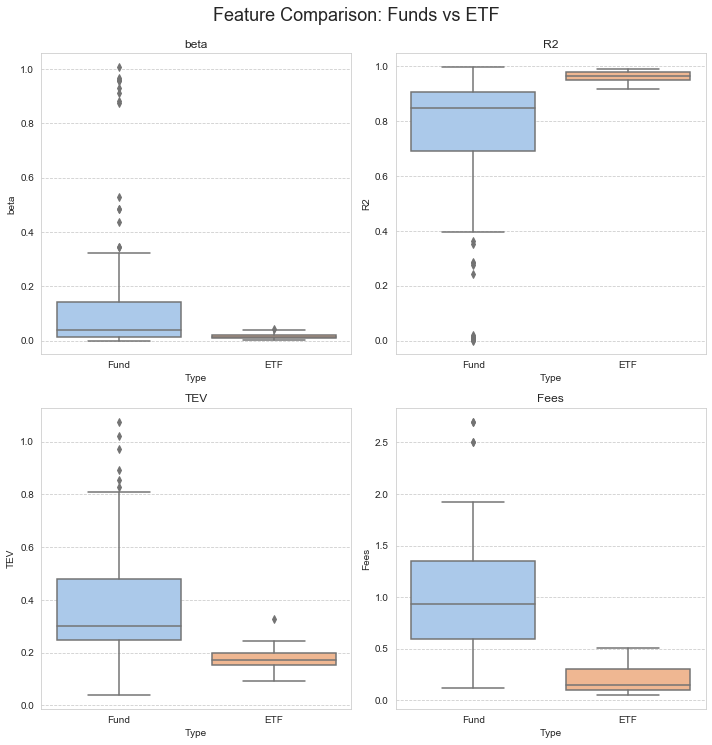

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.ravel()
# features
features = ['beta','R2', 'TEV',	'Fees']

for ax, feat in zip(axs, features):
   sns.boxplot(x="Type",  y=feat, data=df_results_1y_clean, ax=ax, palette="pastel") #order=["Dinner", "Lunch"]
   ax.set_title(feat) 
fig.suptitle('Feature Comparison: Funds vs ETF', fontsize=18, y=1.03)
plt.tight_layout()
plt.savefig('feat_comp1.png',dpi=75,bbox_inches='tight')

Further information can be extrapolated from the features' scatter plots. The critical upshot from these graphs is the relative spatial localisation of the ETF (orange dots) against the funds (blue dots). In all the plots, the ETFs are localised in a specific area meaning that they display consistently a similar set of characteristics that are well described by the selected features. Equally important, there are blue dots (funds) within or close the orange cluster. These funds (they are not necessarily the same in every graph) display a passive hallmark for the selected couple of feature represented in each scatter plot. However, if a fund exhibits similar characteristics to ETFs across all the features couples, it is very likely to be clustered together with the passive funds by the machine learning algorithm.  

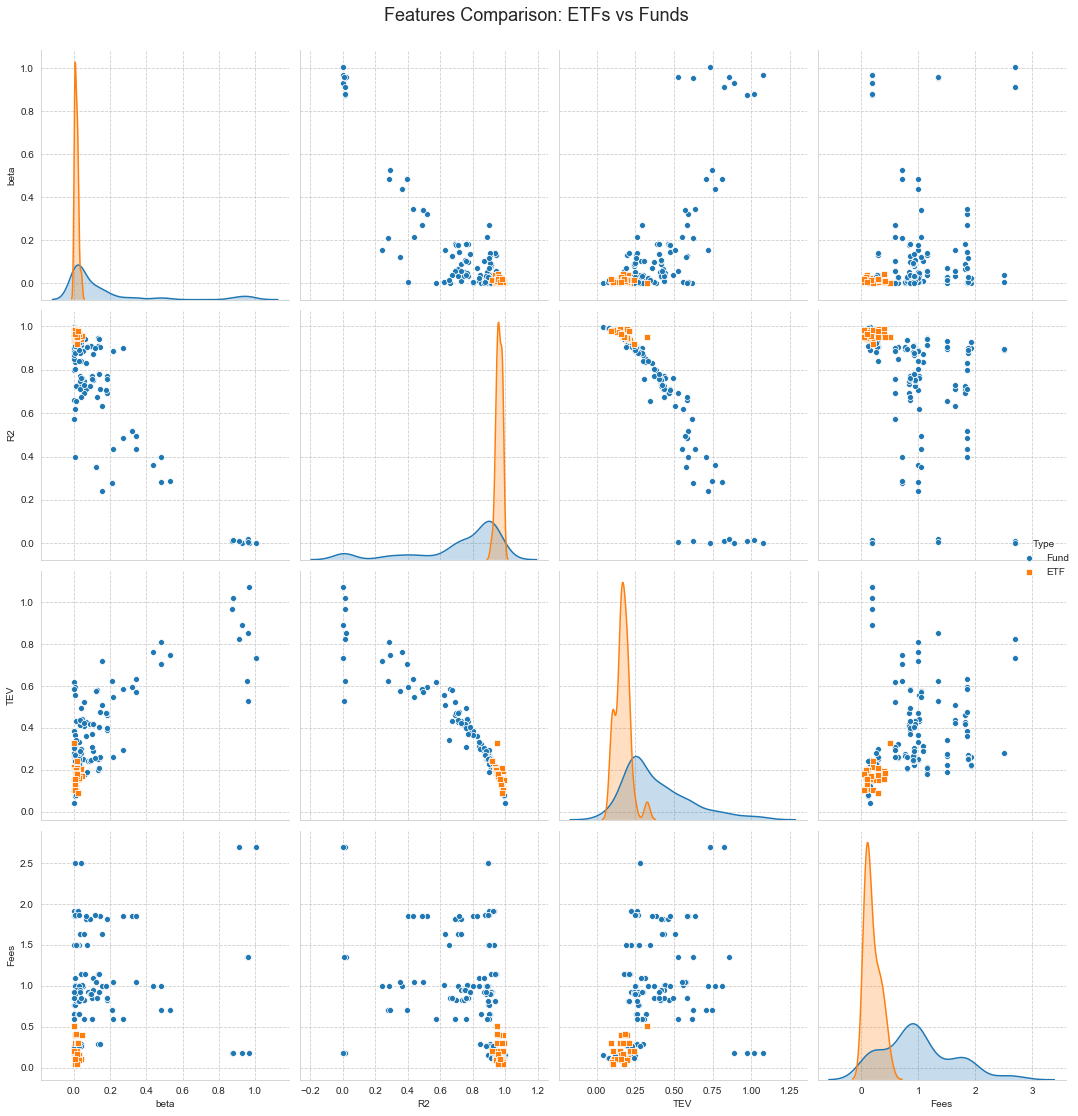

In [33]:
# Create a Pairplot using Seaborn:
fig = sns.pairplot(df_results_1y_clean.loc[:,['beta','R2','TEV','Fees','Type']], hue="Type", markers=["o", "s"]);
fig.fig.set_size_inches(15,15)
fig.fig.suptitle("Features Comparison: ETFs vs Funds", y=1.03, fontsize=18);

plt.tight_layout()
plt.savefig('feat_pairplot.png',dpi=75,bbox_inches='tight')

### 5. Data Pre-Processing:<a id="preprocessing"></a>

As many other machine learning algorithms, clustering analysis can be affected by the scale of the variable it processes. In the specific case of the cross-sectional data used here. By using Boxplots above to analyse this issue, it can be noted that R2 usually scores values as bigger as twice of the size of the beta and the TEV. This difference can affect the analysis as algorithms relaying on euclidean distance might lean to overweight the importance of R2 in comparison to the other features. Moreover, the scatter plots highlight the presence of some outliers that might affect the results. As a result of these considerations, all the features are re-scaled using the following scaling methods: (1) __Standardization__, and (2) __Robust Scaler__. Where the former will take all the features to the same scale and variance and the latter will provides an approach more resilient to the presence of outliers. The results of these transformations are shown in the following graphs.

* Here a series of list are created first, while a subset of the cross sectional table is created to include only the metrics used to classify the funds/etf - the new dataframe is calld "X":

In [34]:
# prepare the data:
X = df_results_1y_clean.loc[:,['beta', 'R2','TEV']]
list_couples =  df_results_1y_clean.index
fund_type = list(df_results_1y_clean.loc[:, 'Type'])
fund_fees = list(df_results_1y_clean.loc[:, 'Fees'])
fund_bench = list(df_results_1y_clean.loc[:, 'Benchmark Kind'])
X.describe()

,beta,R2,TEV
count,148.000000,148.000000,148.000000
mean,0.122480,0.778551,0.339598
std,0.230742,0.259453,0.206241
min,0.000088,0.000032,0.038925
25%,0.009387,0.725703,0.202266
50%,0.029635,0.893928,0.263717
75%,0.117605,0.940574,0.432970
max,1.006516,0.997656,1.075234


#### 5.1 Data Preprocessing: StandardScaler

In [35]:
# Apply Standard Scaler:
scaler = StandardScaler()
X1=X.values
X_ss=scaler.fit_transform(X1)

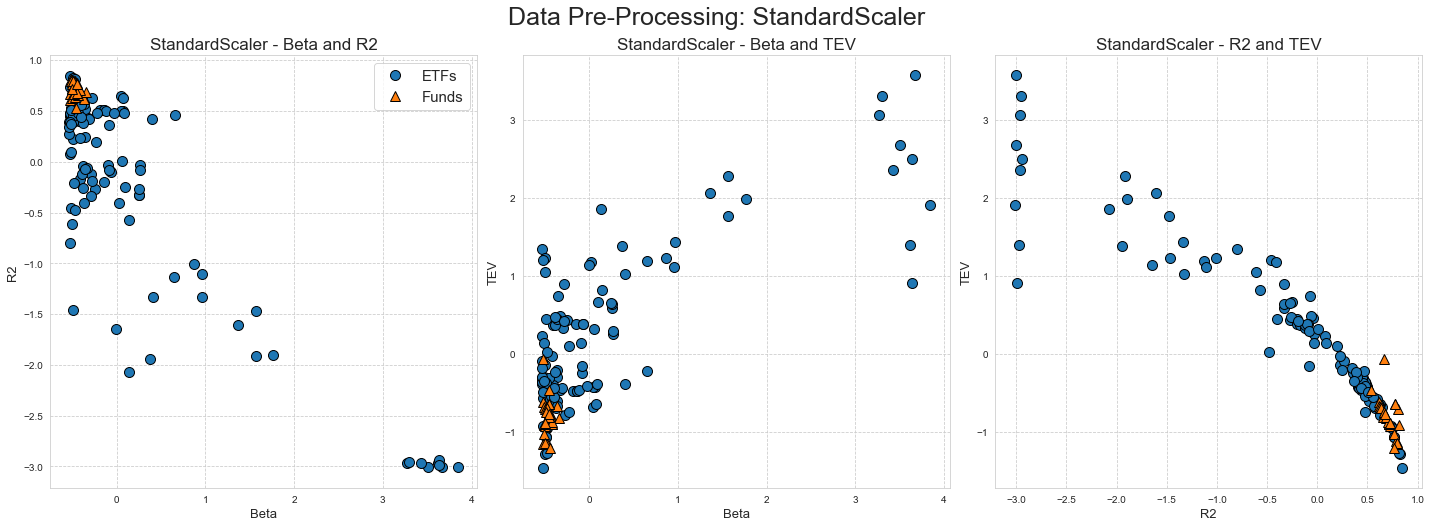

In [36]:
mapper = [1 if i=='ETF' else 0 for i in fund_type]
# Compare the results:
fig, axs = plt.subplots(1, 3, figsize=(20,7))
mglearn.discrete_scatter(X_ss[:,0],X_ss[:,1],mapper, ax=axs[0],labels=['ETFs','Funds']);
axs[0].set_title('StandardScaler - Beta and R2',fontsize=17);
axs[0].set_xlabel('Beta',fontsize=13)
axs[0].set_ylabel('R2',fontsize=13)
axs[0].legend(fontsize=15)
mglearn.discrete_scatter(X_ss[:,0],X_ss[:,2],mapper, ax=axs[1]);
axs[1].set_title('StandardScaler - Beta and TEV',fontsize=17);
axs[1].set_xlabel('Beta',fontsize=13)
axs[1].set_ylabel('TEV',fontsize=13)
mglearn.discrete_scatter(X_ss[:,1],X_ss[:,2],mapper, ax=axs[2]);
axs[2].set_title('StandardScaler - R2 and TEV',fontsize=17);
axs[2].set_xlabel('R2',fontsize=13)
axs[2].set_ylabel('TEV',fontsize=13)
plt.suptitle('Data Pre-Processing: StandardScaler', fontsize = 25, y=1.04);
plt.tight_layout()
plt.savefig('feat_standardscaler.png',dpi=75,bbox_inches='tight')

#### 5.2 Data Preprocessing: Robust Scaler

Despite the two sets of graphs look similar, the relative scale of the features is sensibly different, and this can have a disparate impact on how the elements are clustered together. From the graphs above from the standard-scaler and those below from the robust-scaler, it can be noted that most of the EFTs (orange triangles) are grouped in a specific area of the space. However, some funds (blue dots) are located in the same region as well: these funds display a behaviour comparable  with the passive one.

In [37]:
# Apply Standard Scaler:
scaler = RobustScaler(quantile_range=(10.0, 90.0))
X_mm=scaler.fit_transform(X1)

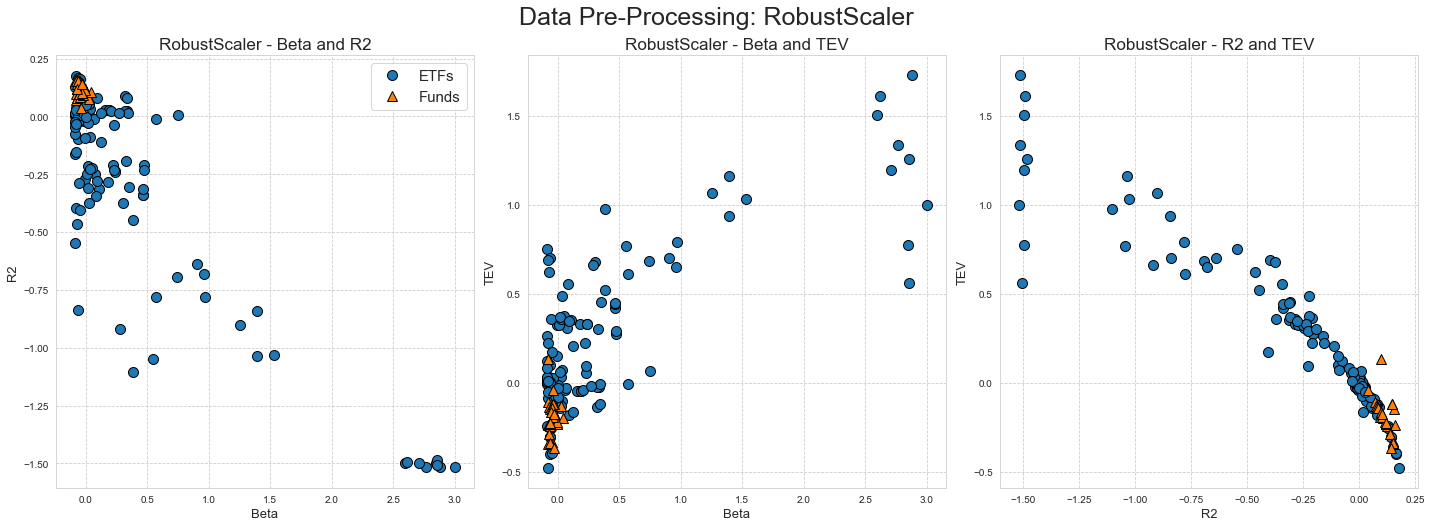

In [38]:
mapper = [1 if i=='ETF' else 0 for i in fund_type]
# Compare the results:
fig, axs = plt.subplots(1, 3, figsize=(20,7))
mglearn.discrete_scatter(X_mm[:,0],X_mm[:,1],mapper, ax=axs[0],labels=['ETFs','Funds']);
axs[0].set_title('RobustScaler - Beta and R2',fontsize=17);
axs[0].set_xlabel('Beta',fontsize=13)
axs[0].set_ylabel('R2',fontsize=13)
axs[0].legend(fontsize=15)
mglearn.discrete_scatter(X_mm[:,0],X_mm[:,2],mapper, ax=axs[1]);
axs[1].set_title('RobustScaler - Beta and TEV',fontsize=17);
axs[1].set_xlabel('Beta',fontsize=13)
axs[1].set_ylabel('TEV',fontsize=13)
mglearn.discrete_scatter(X_mm[:,1],X_mm[:,2],mapper, ax=axs[2]);
axs[2].set_title('RobustScaler - R2 and TEV',fontsize=17);
axs[2].set_xlabel('R2',fontsize=13)
axs[2].set_ylabel('TEV',fontsize=13)
plt.suptitle('Data Pre-Processing: RobustScaler', fontsize = 25, y=1.04);
plt.tight_layout()
plt.savefig('feat_RobustScaler.png',dpi=75,bbox_inches='tight')

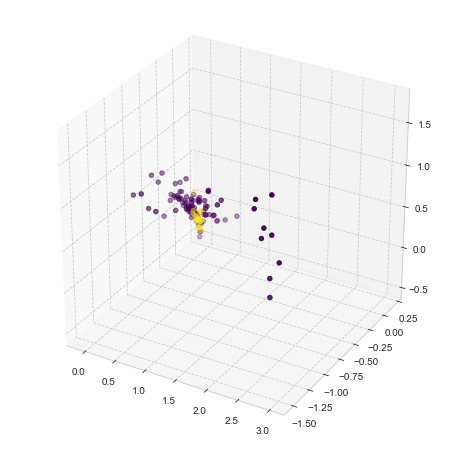

In [39]:
#%matplotlib notebook # Activate this line to explore the graph below dynamically
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")

ax.scatter3D(X_mm[:,0],X_mm[:,1],X_mm[:,2], c=mapper, cmap='viridis');#plot3D(x_line, y_line, z_line, 'gray')

plt.show()

### 6. Clustering Algorithms and Number of Clusters <a id="cluster_number"></a>

In this paper two different clustering approaches have been considered:  

* __K-Means__; and
* __Gaussian Mixture__

The first model is a distance-based algorithm and, in this paper, it relies on the "Euclidean" distance to group together the elements. The Gaussian Mixture algorithm is a distribution-based model: it assumes that there are a certain number of Gaussian distributions, and each of these distributions represents a cluster. 
Since for this dataset there is no ground truth available, a specific study to understand the optimal number of clusters is necessary. Within this particular framework, each cluster represents a different style of management and the cluster grouping together the ETFs along with some funds should be considered as representative of the "Passive \& Closet Tracker" funds.

The following analyses are conducted to understand the right number of clusters:

1. __Elbow Method__ - For K-Means;
2. __BIC and AIC analysis__ - For Gaussian Mixture only.


#### 6.1 Elbow Analysis - K-Means:

The Elbow method relies on the measure of the dispersion of a cluster's elements from its centroid, measured as the sum of squared distances. Since this metric depends on the Euclidean measure for the distance, it is better suited to identify the ideal number of clusters for the K-Means model. 
The analysis covered the data in the three formats considered so far: raw, scaled with the standard-scaler and with the robust scaler.

The three graphs seem to suggest that 3 clusters are the optimal levels, as the lines flatten out for higher numbers. As a result, the K-Means algorithm is fitted using three clusters as input. 

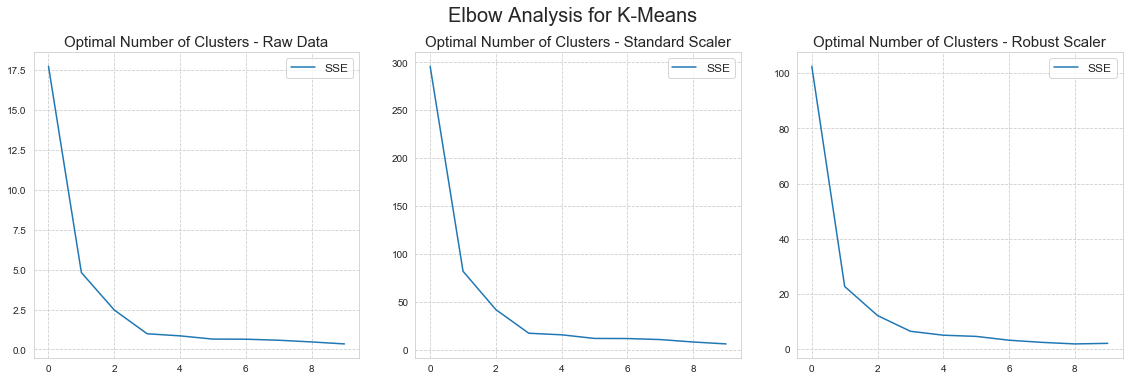

In [40]:
sse_clusters = calculate_WSS(X1, 10)
sse_clusters_ss = calculate_WSS(X_ss, 10)
sse_clusters_mm = calculate_WSS(X_mm, 10)

list_sse = [sse_clusters,sse_clusters_ss,sse_clusters_mm]

fig, axs = plt.subplots(1,3,figsize=(16,5))
axs=axs.ravel()
for sses, ax in zip(list_sse,axs):

  ax.plot(sses, label='SSE')
  ax.legend(fontsize=12)

axs[0].set_title('Optimal Number of Clusters - Raw Data', fontsize=15)
axs[1].set_title('Optimal Number of Clusters - Standard Scaler', fontsize=15)
axs[2].set_title('Optimal Number of Clusters - Robust Scaler', fontsize=15);
plt.suptitle('Elbow Analysis for K-Means', fontsize=20,y=1.05)
plt.tight_layout()
plt.savefig('ElbowAnalysis.png',dpi=75,bbox_inches='tight')

#### 6.2 BIC and AIC Method - Gaussian Mixture
In this section, BIC and AIC metrics are computed for the Gaussian Mixture model using different numbers of clusters as input. The two statistics can provide different optimal results and, given the relatively small size of the dataset, BIC is preferred as it applies higher penalties to additional clusters.  The Figure reports the results. 
According to the BIC metric, the optimal number of clusters for the Gaussian Mixture model occurs at four. This number differs from the one selected for K-Means. However, the goal of the analysis is not to define all the investment styles but to find the one that can be labelled as passive/closet tracker. As long as the model can outline the ETFs and Passive Funds cluster correctly, the number of the remaining clusters/styles is relatively irrelevant. As a result, the Gaussian Mixture model is fitted using four clusters as input.

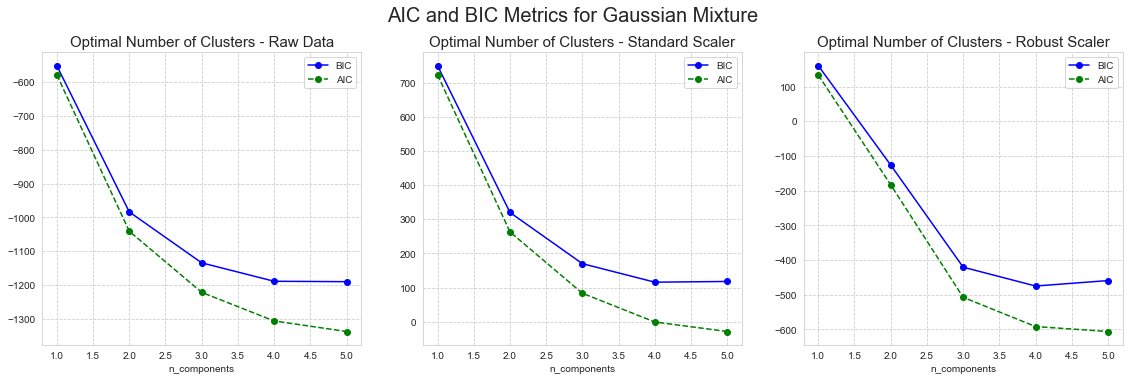

In [41]:
# Calculate the metrics values:
n_components = np.arange(1, 6)
models_X = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=17).fit(X1) for n in n_components]
models_X_ss = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=17).fit(X_ss) for n in n_components]
models_X_mm = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=17).fit(X_mm) for n in n_components]

# Calculate Bic and AIC values:
# 1) X data:
bics_x = [model.bic(X) for model in models_X]
aics_x = [model.aic(X) for model in models_X]
sse=[bics_x,aics_x]
# 2) X_ss data:
bics_xss = [model.bic(X_ss) for model in models_X_ss]
aics_xss = [model.aic(X_ss) for model in models_X_ss]
sse_xss=[bics_xss,aics_xss]
# 3) X_mm data:
bics_xmm = [model.bic(X_mm) for model in models_X_mm]
aics_xmm = [model.aic(X_mm) for model in models_X_mm]
sse_xmm=[bics_xmm,aics_xmm]
# Create the plots:

list_stats = [sse,sse_xss,sse_xmm]

fig, axs = plt.subplots(1,3,figsize=(16,5))
axs=axs.ravel()
for sses, ax in zip(list_stats,axs):

    ax.plot(range(1, 6), sses[0], "bo-", label="BIC")
    ax.plot(range(1, 6), sses[1], "go--", label="AIC")
    ax.legend(loc='best')
    ax.set_xlabel('n_components');
    
axs[0].set_title('Optimal Number of Clusters - Raw Data', fontsize=15)
axs[1].set_title('Optimal Number of Clusters - Standard Scaler', fontsize=15)
axs[2].set_title('Optimal Number of Clusters - Robust Scaler', fontsize=15);
    
plt.suptitle('AIC and BIC Metrics for Gaussian Mixture', fontsize=20,y=1.05)
plt.tight_layout()

plt.savefig('aicbic.png',dpi=75,bbox_inches='tight')

### 7. Cluster Analysis <a id="cluster_ana"></a>

Based on the preceding analysis, a K-Means Model with three clusters and a Gaussian Mixture Model with four clusters are fitted on the data. The graphs represented in this section, showing the results of the clustering process, should be compared with the scatter plots of the scaled data from Section [5](#preprocessing) to locate the cluster incorporating the ETFs straight away. The models are trained on the data scaled using the Standard-Scaler and the Robust-Scaler.

#### 7.1 K-Means and Gaussian Mixture on Standard scaled data:

Even if the final focus is on two models only, a set of 6 clustering algorithsm is trained.
1. Initialize the models:

In [42]:
# initialize Clustering Models
# AgglomerativeClustering:
agc_3=AgglomerativeClustering(n_clusters=3)
# KMeans:
kmc_3 = KMeans(n_clusters=3, random_state=17)
# MeanShift:
ms = MeanShift( )
# # Affinity Propagation:
ap = AffinityPropagation(damping=0.935)
# SpectralClustering
sc = SpectralClustering(n_clusters=3, random_state=17, n_neighbors=5)
# DBSCAN
dbscan = DBSCAN(eps=0.25 , min_samples= 5)
# GaussianMixture
gm_3 = GaussianMixture(n_components=4, n_init=10)

2. Train the models:

In [43]:
# K-mean Cluster:
kmeans_3 = kmc_3.fit(X_ss)
labels_km3=kmeans_3.labels_
# Agglomerative Clustering
agglom_3 = agc_3.fit(X_ss)
labels_agc3=agglom_3.labels_
# MeanShift:
ms_fit = ms.fit(X_ss)
labels_ms = ms_fit.labels_
# # Affinity Propagation:
ap_fit = ap.fit(X_ss)
labels_ap = ap_fit.labels_
# SpectralClustering
sc_3 = sc.fit(X_ss)
labels_sx_3 = sc_3.labels_
# DBSCAN
dbscan_fit = dbscan.fit(X_ss)
labels_dbscan = dbscan_fit.labels_
# GaussianMixture
gm_3_fit = gm_3.fit(X_ss)
labels_gm_ss = gm_3.predict(X_ss)

#### 7.1.1  Highlights: K-Means and GMM

* __K-Means__ :

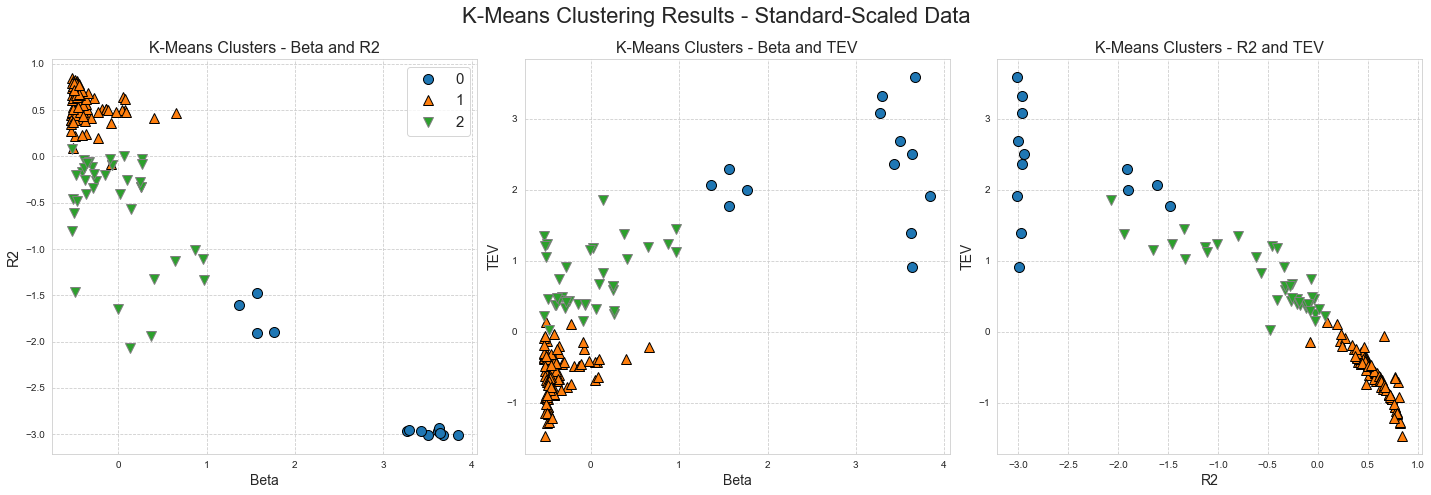

In [44]:
# Compare the results:
fig, axs = plt.subplots(1, 3, figsize=(20,6.5))
mglearn.discrete_scatter(X_ss[:,0],X_ss[:,1],labels_km3, ax=axs[0]);
axs[0].set_title('K-Means Clusters - Beta and R2', fontsize=16);
axs[0].legend(fontsize=15)
mglearn.discrete_scatter(X_ss[:,0],X_ss[:,2],labels_km3, ax=axs[1]);
axs[1].set_title('K-Means Clusters - Beta and TEV', fontsize=16);
mglearn.discrete_scatter(X_ss[:,1],X_ss[:,2],labels_km3, ax=axs[2]);
axs[2].set_title('K-Means Clusters - R2 and TEV', fontsize=16);

axs[0].set_xlabel("Beta", fontsize=14)
axs[0].set_ylabel("R2", fontsize=14)
axs[1].set_xlabel("Beta", fontsize=14)
axs[1].set_ylabel("TEV", fontsize=14)
axs[2].set_xlabel("R2", fontsize=14)
axs[2].set_ylabel("TEV", fontsize=14);

plt.suptitle('K-Means Clustering Results - Standard-Scaled Data',y=1.05,fontsize=22)

plt.tight_layout()

plt.savefig('K-means_ss_results.png',dpi=75,bbox_inches='tight')

* __Gaussian Mixture:__

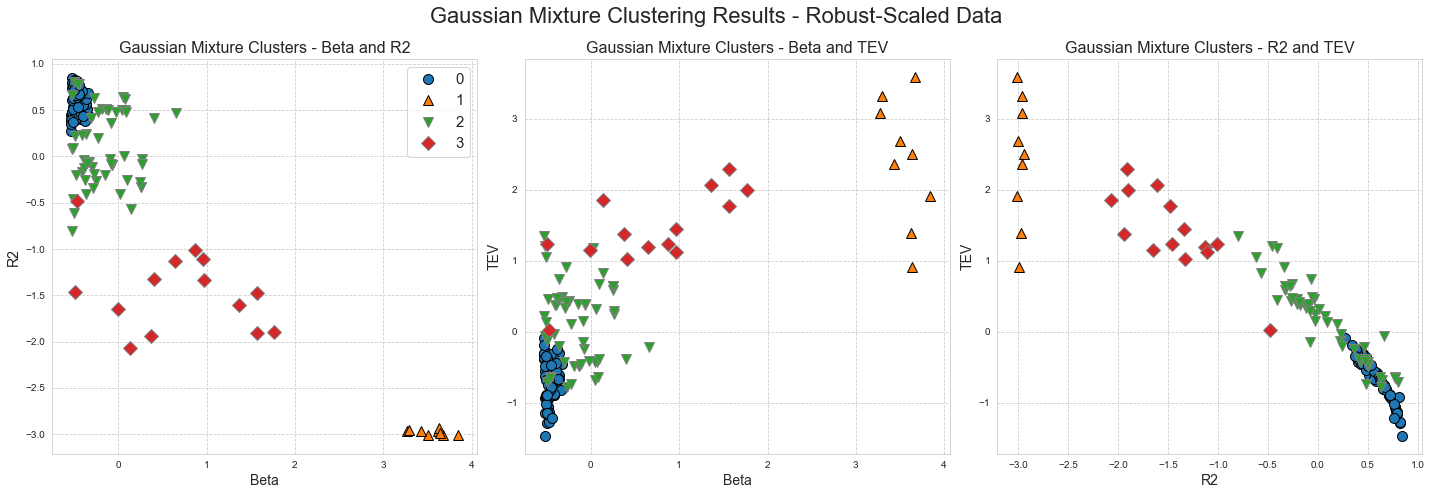

In [45]:
# Compare the results:
fig, axs = plt.subplots(1, 3, figsize=(20,6.5))
mglearn.discrete_scatter(X_ss[:,0],X_ss[:,1],labels_gm_ss, ax=axs[0]);
axs[0].set_title('Gaussian Mixture Clusters - Beta and R2', fontsize=16);
axs[0].legend(fontsize=15)
mglearn.discrete_scatter(X_ss[:,0],X_ss[:,2],labels_gm_ss, ax=axs[1]);
axs[1].set_title('Gaussian Mixture Clusters - Beta and TEV', fontsize=16);
mglearn.discrete_scatter(X_ss[:,1],X_ss[:,2],labels_gm_ss, ax=axs[2]);
axs[2].set_title('Gaussian Mixture Clusters - R2 and TEV', fontsize=16);

axs[0].set_xlabel("Beta", fontsize=14)
axs[0].set_ylabel("R2", fontsize=14)
axs[1].set_xlabel("Beta", fontsize=14)
axs[1].set_ylabel("TEV", fontsize=14)
axs[2].set_xlabel("R2", fontsize=14)
axs[2].set_ylabel("TEV", fontsize=14);

plt.suptitle('Gaussian Mixture Clustering Results - Robust-Scaled Data',y=1.05,fontsize=22)

plt.tight_layout()

plt.savefig('GMM_ss_results.png',dpi=75,bbox_inches='tight')

#### 7.2 K-Means and Gaussian Mixture on Robust scaled data:
Even if the final focus is on two models only, a set of 6 clustering algorithsm is trained.

1. Initialize the models:

In [46]:
# K-mean Cluster:
kmeans_3 = kmc_3.fit(X_mm)
labels_km3=kmeans_3.labels_
# Agglomerative Clustering
agglom_3 = agc_3.fit(X_mm)
labels_agc3=agglom_3.labels_
# MeanShift:
ms_fit = ms.fit(X_mm)
labels_ms = ms_fit.labels_
# # Affinity Propagation:
ap_fit = ap.fit(X_mm)
labels_ap = ap_fit.labels_
# SpectralClustering
sc_3 = sc.fit(X_mm)
labels_sx_3 = sc_3.labels_
# DBSCAN
dbscan_fit = dbscan.fit(X_mm)
labels_dbscan = dbscan_fit.labels_
# GaussianMixture
gm_3_fit = gm_3.fit(X_mm)
labels_gm_mm = gm_3.predict(X_mm)

#### 7.2.1 Highlights: K-Means and GMM

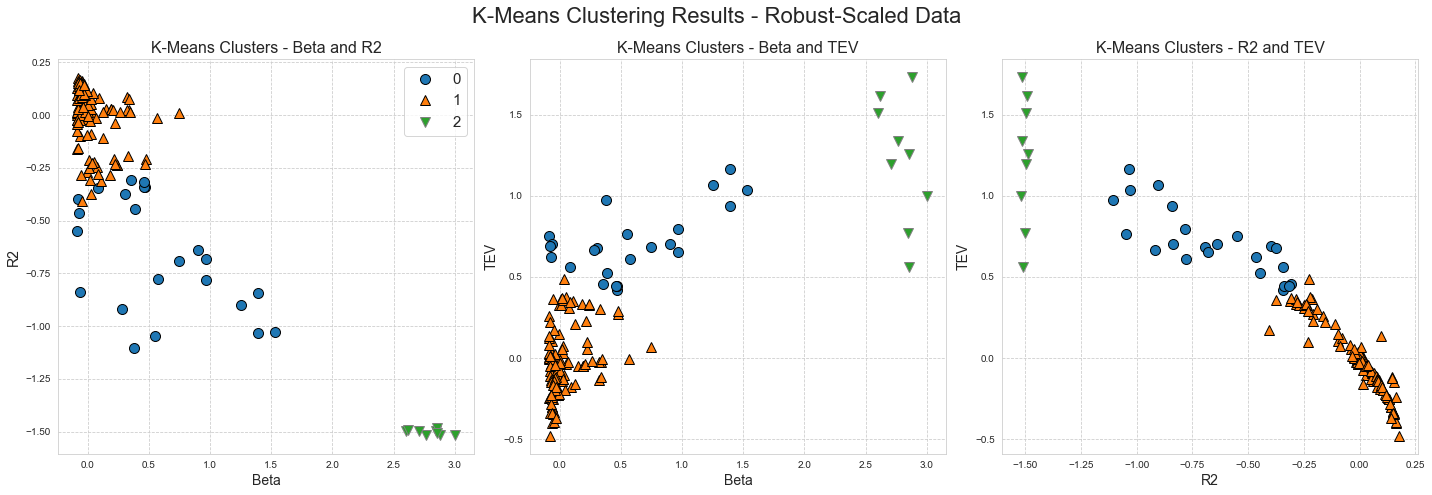

In [47]:
# Compare the results:
fig, axs = plt.subplots(1, 3, figsize=(20,6.5))
mglearn.discrete_scatter(X_mm[:,0],X_mm[:,1],labels_km3, ax=axs[0]);
axs[0].set_title('K-Means Clusters - Beta and R2', fontsize=16);
axs[0].legend(fontsize=15)
mglearn.discrete_scatter(X_mm[:,0],X_mm[:,2],labels_km3, ax=axs[1]);
axs[1].set_title('K-Means Clusters - Beta and TEV', fontsize=16);
mglearn.discrete_scatter(X_mm[:,1],X_mm[:,2],labels_km3, ax=axs[2]);
axs[2].set_title('K-Means Clusters - R2 and TEV', fontsize=16);

axs[0].set_xlabel("Beta", fontsize=14)
axs[0].set_ylabel("R2", fontsize=14)
axs[1].set_xlabel("Beta", fontsize=14)
axs[1].set_ylabel("TEV", fontsize=14)
axs[2].set_xlabel("R2", fontsize=14)
axs[2].set_ylabel("TEV", fontsize=14);

plt.suptitle('K-Means Clustering Results - Robust-Scaled Data',y=1.05,fontsize=22)

plt.tight_layout()

plt.savefig('K-means_mm_results.png',dpi=75,bbox_inches='tight')

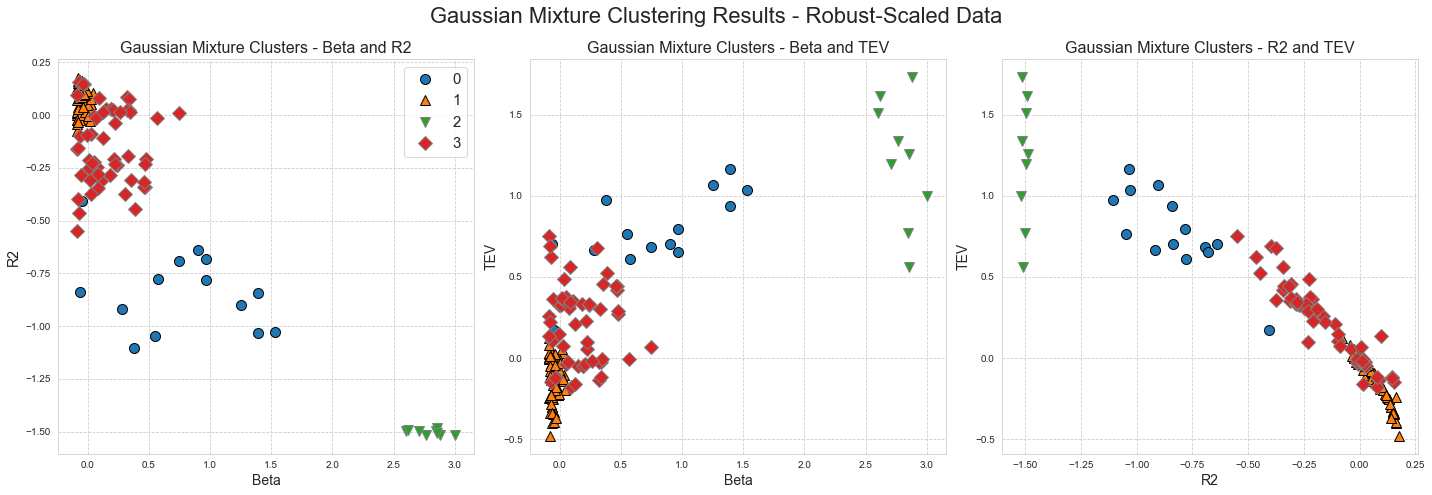

In [48]:
# Compare the results:
fig, axs = plt.subplots(1, 3, figsize=(20,6.5))
mglearn.discrete_scatter(X_mm[:,0],X_mm[:,1],labels_gm_mm, ax=axs[0]);
axs[0].set_title('Gaussian Mixture Clusters - Beta and R2', fontsize=16);
axs[0].legend(fontsize=15)
mglearn.discrete_scatter(X_mm[:,0],X_mm[:,2],labels_gm_mm, ax=axs[1]);
axs[1].set_title('Gaussian Mixture Clusters - Beta and TEV', fontsize=16);
mglearn.discrete_scatter(X_mm[:,1],X_mm[:,2],labels_gm_mm, ax=axs[2]);
axs[2].set_title('Gaussian Mixture Clusters - R2 and TEV', fontsize=16);

axs[0].set_xlabel("Beta", fontsize=14)
axs[0].set_ylabel("R2", fontsize=14)
axs[1].set_xlabel("Beta", fontsize=14)
axs[1].set_ylabel("TEV", fontsize=14)
axs[2].set_xlabel("R2", fontsize=14)
axs[2].set_ylabel("TEV", fontsize=14);

plt.suptitle('Gaussian Mixture Clustering Results - Robust-Scaled Data',y=1.05,fontsize=22)

plt.tight_layout()

plt.savefig('GMM_mm_results.png',dpi=75,bbox_inches='tight')

### 8 Comments and analysis on clustering results:

The results from the Robust-Scaled data using the Gaussian Mixture model are only apparently different. The model uses different labels to identify the same cluster: the former cluster n.0 is now labelled as n.2, but the included instances seem to overlap. With the only irrelevant exception on the different labels, the clusters identified on the Robust-scaled data seem to not differ from those spotted on the Standard-Scaled Data. The same does not apply for the clusters established by the K-Means model. In this case, switching from the standard-scaled data to the robust-scaled means a significant shift in the boundaries. The cluster n.1 derived from the K-Means model covers the area of the graph where ETFs are. However, its boundaries fluctuate significantly according to the data pre-processing procedure applied.
Based on that, it can be inferred that the four clusters selected with the Gaussian Mixtures are more stable and better defined than the three defined by the K-Means model. A further confirmation arrives from the comparison of the Silhouette diagrams of the two set of clusters shown in the pictures below. In the diagram, each knife-shaped form represents a cluster, with the height indicating the number of instances and the width the Silhouette coefficient. The dashed vertical line represents the Silhouette score for each number of cluster. When most of the instance or the whole cluster is below this level, it means that the cluster itself is not well defined.
As a result, the three K-Means clusters seem relatively worst than those defined with the Gaussian Mixture model. The Silhouette analysis have been extended to cover the outputs from different numbers of clusters. From these graphs, it can be inferred that K-Means clusters start to be well defined when they are set at five. However, this is not consistent with the information from the Elbow analysis. On the contrary, the Gaussian Mixture model seems to deliver more robust and consistent results. The four clusters derived from the Gaussian Mixture are better defined than those in K-means and adding further clusters does not improve the clusters' shapes, consistently with the silhouette analysis. Based on this evidence, it is fair to state that the clusters produced by the Gaussian Mixture are better suited for identifying the potential closet tracker funds.

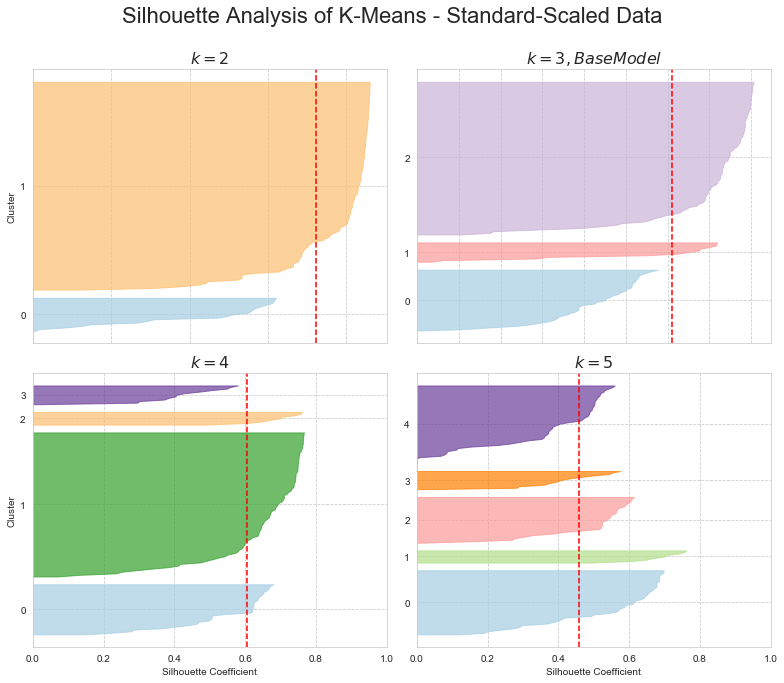

In [49]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_ss)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X_ss, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_ss, y_pred)

    padding = len(X_ss) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Paired(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.xlim(left=0)
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    if k ==3:
        plt.title("$k={},  Base Model$".format(k), fontsize=16)
    else:
        plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.suptitle('Silhouette Analysis of K-Means - Standard-Scaled Data',fontsize=22,y=1.05)
plt.tight_layout()

plt.savefig('silhouette_ss.png',dpi=75,bbox_inches='tight')

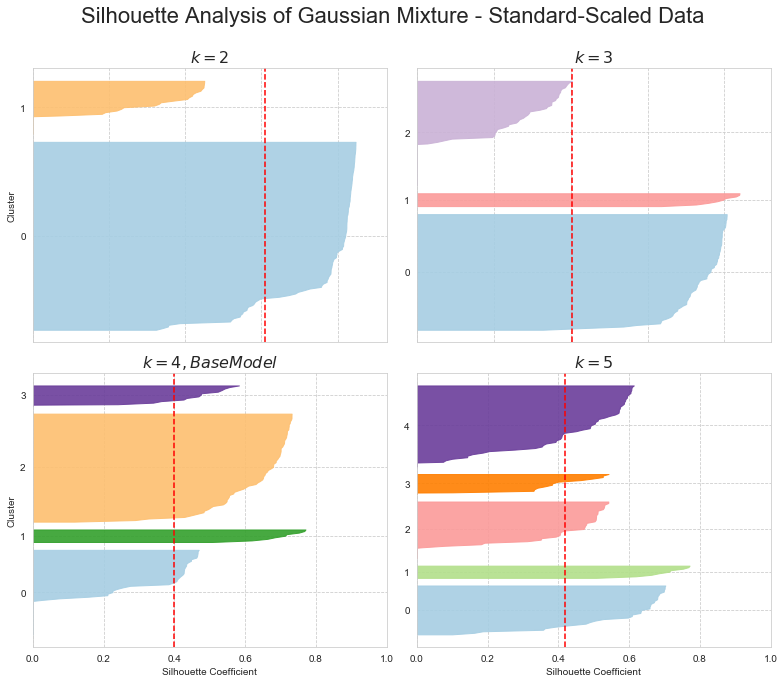

In [50]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

GMM_per_k = [GaussianMixture(n_components=k, n_init=10).fit(X_ss)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X_ss, model.predict(X_ss))
                     for model in GMM_per_k[1:]]

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = GMM_per_k[k - 1].predict(X_ss)
    silhouette_coefficients = silhouette_samples(X_ss, y_pred)

    padding = len(X_ss) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Paired(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.9)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.xlim(left=0)
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    if k ==4:
        plt.title("$k={},  Base Model$".format(k), fontsize=16)
    else:
        plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.suptitle('Silhouette Analysis of Gaussian Mixture - Standard-Scaled Data',fontsize=22,y=1.05)
plt.tight_layout()

plt.savefig('silhouette_mm.png',dpi=75,bbox_inches='tight')

### 8. Analysis of the Passive Cluster's Instances

Before starting to analyze the cluster, the results produced by the Gaussian Mixture model on the standard and robust scaled data are compared. The goal is to confirm that the funds identified for further analysis is the same in both clusters. A simple diagnostic on the two clusters produces the following results:

1. Preparing the data:

In [51]:
######## PREPARE DATA FROM CLUSTERS ON STANDARD SCALERS ##########

# Create Lists:
list_couples =  df_results_1y_clean.index
fund_type = list(df_results_1y_clean.loc[:, 'Type'])
fund_fees = list(df_results_1y_clean.loc[:, 'Fees'])
fund_bench = list(df_results_1y_clean.loc[:, 'Benchmark Kind'])

# Store the results from the Standard Scaled data in a dataframe:
results_ss = pd.DataFrame(data=[list(list_couples),list(labels_gm_ss),fund_type,fund_bench,fund_fees]).T
results_ss.columns=['Comparison','Cluster Class','Fund or ETF','Total Return','Fees']
results_ss.set_index('Cluster Class',inplace=True)

# Identify the passive cluster's label 
passive_class_cluster_ss=results_ss[results_ss.loc[:,'Fund or ETF']=='ETF'].index[5]
print('Passive Trackers Cluster Label:',passive_class_cluster_ss)

# Split the cluster between funds and etfs:
cluster_passive_ss = results_ss.loc[passive_class_cluster_ss,:]
cluster_passive_funds_ss = cluster_passive_ss[cluster_passive_ss.loc[:,'Fund or ETF']=='Fund']
# Funds
new = cluster_passive_funds_ss["Comparison"].str.split(",", n = 1, expand = True)
new1 = new[0].str.split(":", n = 1, expand = True)
cluster_passive_funds_ss['Fund Code']=new1[1]
# ETFs
cluster_passive_etf_ss = cluster_passive_ss[cluster_passive_ss.loc[:,'Fund or ETF']=='ETF']
print(len(cluster_passive_etf_ss['Comparison'].unique())
)

######## PREPARE DATA FROM CLUSTER ON ROBUST SCALERS ##########
# Store the results from the Standard Scaled data in a dataframe:
results_mm = pd.DataFrame(data=[list(list_couples),list(labels_gm_mm),fund_type,fund_bench,fund_fees]).T
results_mm.columns=['Comparison','Cluster Class','Fund or ETF','Total Return','Fees']
results_mm.set_index('Cluster Class',inplace=True)

# Identify the passive cluster's label 
passive_class_cluster_mm = results_mm[results_mm.loc[:,'Fund or ETF']=='ETF'].index[5]
print('Passive Trackers Cluster Label:',passive_class_cluster_mm)

cluster_passive_mm = results_mm.loc[passive_class_cluster_mm,:]
cluster_passive_funds_mm = cluster_passive_mm[cluster_passive_mm.loc[:,'Fund or ETF']=='Fund']

new_mm = cluster_passive_funds_mm["Comparison"].str.split(",", n = 1, expand = True)
new_mm_1 = new_mm[0].str.split(":", n = 1, expand = True)
new_mm_2 = new_mm[1].str.split(":", n = 1, expand = True)
cluster_passive_funds_mm['Fund Code']=new_mm_1[1]
cluster_passive_funds_mm['Index']=new_mm_2[1]

cluster_passive_etf_mm = cluster_passive_mm[cluster_passive_mm.loc[:,'Fund or ETF']=='ETF']
print(len(cluster_passive_etf_mm['Comparison'].unique()))

Passive Trackers Cluster Label: 0
27
Passive Trackers Cluster Label: 1
27


C:\Users\fabrizioxueling\Anaconda3\envs\tensorflow2_env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fabrizioxueling\Anaconda3\envs\tensorflow2_env\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fabrizioxueling\Anaconda3\envs\tensorflow2_env\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

2. Run Diagnostic on the clusters comparing if the cluster created on the standard-scaled data and the one on the robust scaled data capture the same set of potential passive funds:

In [52]:
print('Verify that the Passive Fund cluster, built using Gaussian Mixture model \
on Standard-Scaled \nand Robust-Scaled data, aggregates the same set of Funds:\n',
      (cluster_passive_funds_mm.loc[:,'Fund Code'].unique()==\
       cluster_passive_funds_ss.loc[:,'Fund Code'].unique()).any())

print('\nList of passive funds candidates:\n',cluster_passive_funds_mm.loc[:,'Fund Code'].unique())

print('\nNumber of passive funds candidates:\n',len(cluster_passive_funds_mm.loc[:,'Fund Code'].unique()))

print('\nNumebr of the unique ETFs in the Cluster derived from Standard Scaled data:\n', len(cluster_passive_etf_ss['Comparison'].unique()))

print('\nNumebr of the unique ETFs in the Cluster derived from Robust Scaled data:\n', len(cluster_passive_etf_mm['Comparison'].unique()))

Verify that the Passive Fund cluster, built using Gaussian Mixture model on Standard-Scaled 
and Robust-Scaled data, aggregates the same set of Funds:
 True

List of passive funds candidates:
 ['AEEI2EC LX Equity' 'CAIXEIA LX Equity' 'AXWEOFC LX Equity'
 'AXWECEI LX Equity' 'ETDD FP Equity' 'CSEMICE LX Equity'
 'CSIEEDE LX Equity' 'PAMEULF BB Equity' 'STHOPMI FP Equity'
 'FIDFEBI LX Equity' 'SGEURIE LX Equity' 'METVSRI FP Equity'
 'NATISRI LX Equity' 'INGEHDI LX Equity' 'PIPTFEI LX Equity'
 'SSEIIEU LX Equity' 'TEMGRIA LX Equity' 'UBSEITL LX Equity'
 'VANESII ID Equity']

Number of passive funds candidates:
 19

Numebr of the unique ETFs in the Cluster derived from Standard Scaled data:
 27

Numebr of the unique ETFs in the Cluster derived from Robust Scaled data:
 27


From the figures reported, it can be noted that the cluster embeds the vast majority of the ETFs used for the analysis, 27 out of 31. On the top of that, the cluster also aggregates 19 funds. Among these funds, the focus is on those that have a fee's profile inconsistent with their passive nature. This approach is consistent with CBI's "Value for Money" strategy in analyzing a fund's behaviour. Coherently, the list of 19 funds is filtered to eliminate those with a fee profile consistent with their passive nature, using 60bps as a threshold. After this step, the number of potential closet trackers shrinks from 19 to 12. For these 12 funds, the procedure identifies 24 matches with indices where they display features consistent with a "closet tracker" behaviour. Moreover, all these funds require the investors to pay a level of fees not consistent with their investment approach. These are the funds that should fall under the regulatory scrutiny to verify if the investment strategy is properly disclosed, and the investors are correctly informed. The full list of matches between funds and indices are reported in the table below.

In the table, the funds are sorted from high to low according to their management fees. In the last part of the paper, the first three funds of the list are explored in greater details to verify that the insights generated by this procedure are reliable. For each fund, a visual analysis against the selected indices is performed along with a more detailed review of the regression used to produce the fund metrics.

In [53]:
# Remove the funds with low management fees from the list:
cluster_passive_funds_highfees = cluster_passive_funds_mm[cluster_passive_funds_mm.loc[:,'Fees']>0.6]
cluster_passive_funds_highfees.sort_values('Fees',inplace=True,ascending=False)
cluster_passive_funds_highfees.reset_index()

C:\Users\fabrizioxueling\Anaconda3\envs\tensorflow2_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cluster Class,Comparison,Fund or ETF,Total Return,Fees,Fund Code,Index
0,1,"Fund:AEEI2EC LX Equity, Index:NDDLEMU Index",Fund,1,2.5,AEEI2EC LX Equity,NDDLEMU Index
1,1,"Fund:AEEI2EC LX Equity, Index:S&P_Euro_75",Fund,1,2.5,AEEI2EC LX Equity,S&P_Euro_75
2,1,"Fund:FIDFEBI LX Equity, Index:NE700862 Index",Fund,0,1.92,FIDFEBI LX Equity,NE700862 Index
3,1,"Fund:FIDFEBI LX Equity, Index:MXEM Index",Fund,0,1.92,FIDFEBI LX Equity,MXEM Index
4,1,"Fund:FIDFEBI LX Equity, Index:SXXT Index",Fund,0,1.92,FIDFEBI LX Equity,SXXT Index
5,1,"Fund:UBSEITL LX Equity, Index:S&P_EURO_PLUS",Fund,1,1.87,UBSEITL LX Equity,S&P_EURO_PLUS
6,1,"Fund:UBSEITL LX Equity, Index:NDDLE15 Index",Fund,1,1.87,UBSEITL LX Equity,NDDLE15 Index
7,1,"Fund:METVSRI FP Equity, Index:SXXT Index",Fund,0,1.5,METVSRI FP Equity,SXXT Index
8,1,"Fund:METVSRI FP Equity, Index:LCXE Index",Fund,0,1.5,METVSRI FP Equity,LCXE Index
9,1,"Fund:METVSRI FP Equity, Index:SLVT Index",Fund,0,1.5,METVSRI FP Equity,SLVT Index


In [54]:
cluster_passive_funds_highfees.loc[:,'Fund Code'].unique()
cluster_passive_funds_highfees.loc[:,'Index'].unique()

list_securities = list(cluster_passive_funds_highfees.loc[:,'Fund Code'].unique())+list(cluster_passive_funds_highfees.loc[:,'Index'].unique())
#list_securities

test_passive=df_main_d.loc[:,list_securities][-250:].dropna()
test_passive.head(3)

,AEEI2EC LX Equity,FIDFEBI LX Equity,UBSEITL LX Equity,METVSRI FP Equity,STHOPMI FP Equity,AXWEOFC LX Equity,TEMGRIA LX Equity,PAMEULF BB Equity,NATISRI LX Equity,INGEHDI LX Equity,...,NE700862 Index,MXEM Index,SXXT Index,S&P_EURO_PLUS,NDDLE15 Index,LCXE Index,SLVT Index,E300 Index,FTEFC1 Index,MSER Index
Dates,,,,,,,,,,,,,,,,,,,,,
2018-12-11,0.012240,0.013085,0.012581,0.011140,0.011287,0.010634,0.004582,0.012995,0.011217,0.011976,...,0.009883,0.012746,0.013014,0.014621,0.013655,0.013049,0.012274,0.014878,0.013313,0.012801
2018-12-12,0.015719,0.018877,0.016863,0.018942,0.016643,0.013749,0.014698,0.018014,0.016958,0.016405,...,0.015540,0.018060,0.017678,0.016467,0.015536,0.017618,0.019340,0.016809,0.017815,0.017942
2018-12-13,-0.002381,-0.002925,-0.003491,-0.000105,0.001830,-0.003460,-0.002498,0.000214,-0.003106,-0.001168,...,0.000603,-0.000127,-0.000464,-0.001497,-0.001140,0.000029,0.002400,-0.001144,0.000697,0.000754


A set of three potential passive tracker are studied:

#### 8.1 Potential Tracker n.1: AEEI2EC LX:

This is a Luxembourg domiciled fund. According to the Fund's KIID: "___The Fund's investment objective is to provide capital growth and income over the long-term, by investing primarily in units or shares of UCITS or other UCIs, providing exposure to the European equity market. To achieve its objective, the Fund invests primarily in a diversified portfolio of equity mutual funds, managed by leading international asset managers, which mainly invest in European equities. The Fund is *actively managed*.___" ([link](https://www.alphamutual.gr/assets/media/PDF/3/620.pdf)). This is an actively managed fund of funds and, according to the data downloaded from Bloomberg, the ongoing management fees are 2.5\%. However, the analysis suggests that this fund might be classified as a closet tracker against two indices: NDDLEMU and the S\&P Euro 75. As initial pieces of evidence, a graphical comparison of the funds daily and cumulated returns are presented.

In [55]:
df_results_1y.loc[cluster_passive_funds_highfees.iloc[0,0],:]

beta              0.00638687
R2                  0.890447
TEV                 0.280012
Type                    Fund
Fees                     2.5
Benchmark Kind             1
Name: Fund:AEEI2EC LX Equity, Index:NDDLEMU Index, dtype: object

In [56]:
df_results_1y.loc[cluster_passive_funds_highfees.iloc[1,0],:]

beta              0.0385712
R2                  0.89336
TEV                0.278072
Type                   Fund
Fees                    2.5
Benchmark Kind            1
Name: Fund:AEEI2EC LX Equity, Index:S&P_Euro_75, dtype: object

#### Graphical Analysis:

These graphs seems to confirm that over the last year the fund's performances have been remarkably similar to those of two identified indices. In the scatter plot of the daily returns, most of the points lie in the proximity of the identity line. The regressions of the fund's daily returns on the two indices confirm that the Beta is quite close to one and the R2 in the range of 0.9. The regressions also show that the constant is very close to zero, -0.23 and -0.38 basis points.


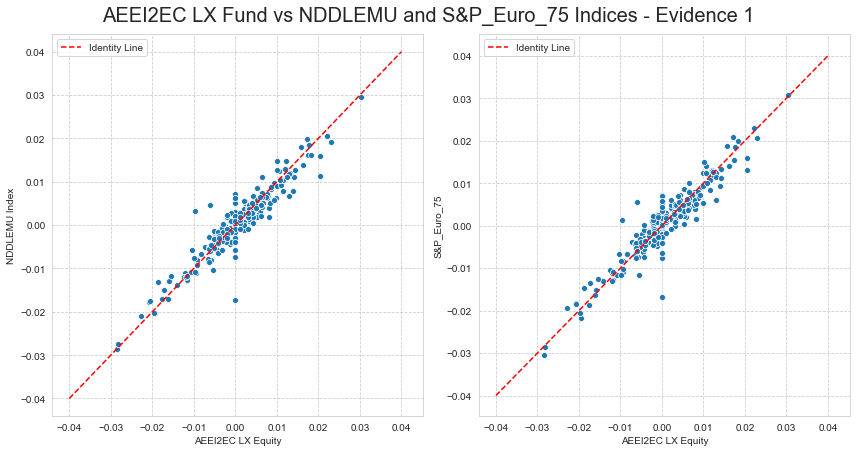

In [57]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
X_plot = np.linspace(-0.04,0.04,100)
Y_plot = X_plot



ax=axs.ravel()
sns.scatterplot(x="AEEI2EC LX Equity", y="NDDLEMU Index", data=test_passive, ax=ax[0]);
ax[0].plot(X_plot, Y_plot, color='r', ls='--', label='Identity Line')
ax[0].legend()
sns.scatterplot(x='AEEI2EC LX Equity',y='S&P_Euro_75', data=test_passive, ax=ax[1]);
ax[1].plot(X_plot, Y_plot, color='r', ls='--', label='Identity Line')
ax[1].legend()

plt.suptitle('AEEI2EC LX Fund vs NDDLEMU and S&P_Euro_75 Indices - Evidence 1', fontsize=20, y=1.04)
plt.tight_layout()

plt.savefig('fund1_analysis0.png',dpi=75,bbox_inches='tight')

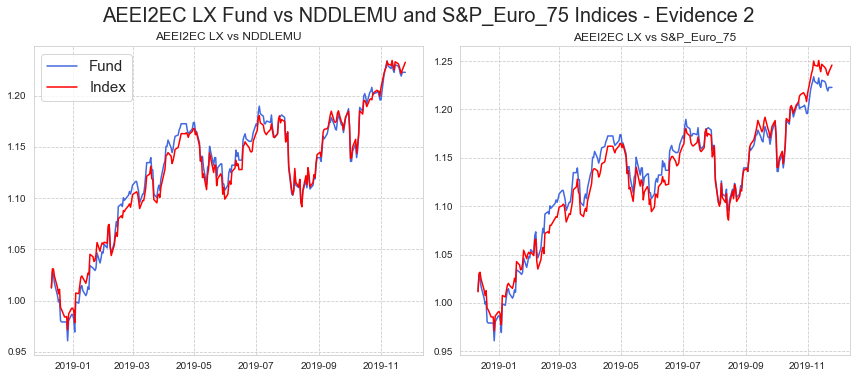

In [58]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

test_passive_cum = (test_passive+1).cumprod()
fig, axs = plt.subplots(1,2,figsize=(12,5))
ax=axs.ravel()

ax[0].plot(test_passive_cum.loc[:,'AEEI2EC LX Equity'],color='royalblue',label='Fund')
ax[0].plot(test_passive_cum.loc[:,'NDDLEMU Index'],color='r',label='Index')
ax[0].legend(fontsize=15)
ax[0].set_title('AEEI2EC LX vs NDDLEMU')
ax[1].plot(test_passive_cum.loc[:,'AEEI2EC LX Equity'],color='royalblue',label='Fund')
ax[1].plot(test_passive_cum.loc[:,'S&P_Euro_75'],color='r',label='Index')
ax[1].set_title('AEEI2EC LX vs S&P_Euro_75')
plt.suptitle('AEEI2EC LX Fund vs NDDLEMU and S&P_Euro_75 Indices - Evidence 2', fontsize=20, y=1.04)

plt.tight_layout()
plt.savefig('fund1_analysis1.png',dpi=75,bbox_inches='tight');

#### Regression Check:

In [59]:
import statsmodels.api as sm
# Create features and implement regression against the first Index
X_r = test_passive.loc[:,'NDDLEMU Index'].values
Y = test_passive.loc[:,'AEEI2EC LX Equity'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()

print(results.summary())
# Create features and implement regression against the Second Index
X_r = test_passive.loc[:,'S&P_Euro_75'].values
Y = test_passive.loc[:,'AEEI2EC LX Equity'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2016.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          4.39e-121
Time:                        18:32:42   Log-Likelihood:                 1114.8
No. Observations:                 250   AIC:                            -2226.
Df Residuals:                     248   BIC:                            -2219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.293e-05      0.000     -0.128      0.8

#### 8.2 Potential Tracker n.2: FIDFEBI LX 

This is a Luxembourg domiciled fund. According to the Fund's KIID: __Aims to provide long-term capital growth with the level of income expected to be low. At least 70\% invested in the shares of blue chip companies in countries that are members of the Economic Monetary Union, and at least 70\% denominated in Euro. Currently, there are nineteen member countries but if other countries join in the future, then investment in these countries
may also be considered for inclusion in the fund.
n Has the freedom to invest outside the fund's principal geographies, market sectors, industries or asset classes. May invest in assets directly or achieve exposure indirectly through other eligible means including derivatives. Can use derivatives with the aim of risk or cost reduction or to generate additional capital or income, including for investment purposes, in line with the fund’s risk
profile. The fund has discretion in its choices of investments within its objectives and policies.__" ([link](https://www.morningstar.co.uk/uk/funds/snapshot/snapshot.aspx?id=F0GBR04D0T&tab=14&DocumentId=8a98950696b9755b1ac3200e81cc70b3&Format=PDF)).  The running management fees are 1.92\%, according to Bloomberg. The document does not specify if the fund is active or passive. However, the KIID's description is more consistent with an actively managed fund. The analysis suggest that this fund might be classified as a closet tracker against three indices: NE700862, MXEM and the SXXT. As initial evidence, a graphical comparison of the funds' daily and cumulated returns are analyzed.

These graphs seems to confirm that over the last year the fund's performances have been remarkably similar to at least two of the three selected indices. Indeed, the MXEM index seems to lag significantly behind when the cumulated performance is considered.   In the scatter plot of the daily returns, most of the points lie in the proximity of the identity line. The regressions of the fund's daily returns on the two indices confirm that the Beta is quite close to one and the R2 in the range of 0.9. However, some critical insight comes from the review of the fund against the MXEM Index. Despite having all the main statistic in line with those observed against the other two indices, the fund seems to outperform significantly against the MXEM. Additional information on this score is discussed in the analysis of the next fund. With regards to the other two Indices, the fund seems to track their performances quite closely.

In [60]:
df_results_1y.loc[cluster_passive_funds_highfees.iloc[2,0],:]

beta              0.00115862
R2                  0.898937
TEV                 0.259996
Type                    Fund
Fees                    1.92
Benchmark Kind             0
Name: Fund:FIDFEBI LX Equity, Index:NE700862 Index, dtype: object

In [61]:
df_results_1y.loc[cluster_passive_funds_highfees.iloc[3,0],:]

beta              0.0252459
R2                 0.925787
TEV                0.223727
Type                   Fund
Fees                   1.92
Benchmark Kind            0
Name: Fund:FIDFEBI LX Equity, Index:MXEM Index, dtype: object

In [62]:
df_results_1y.loc[cluster_passive_funds_highfees.iloc[4,0],:]

beta              0.0199605
R2                 0.927954
TEV                0.220106
Type                   Fund
Fees                   1.92
Benchmark Kind            0
Name: Fund:FIDFEBI LX Equity, Index:SXXT Index, dtype: object

#### Graphical Analysis:

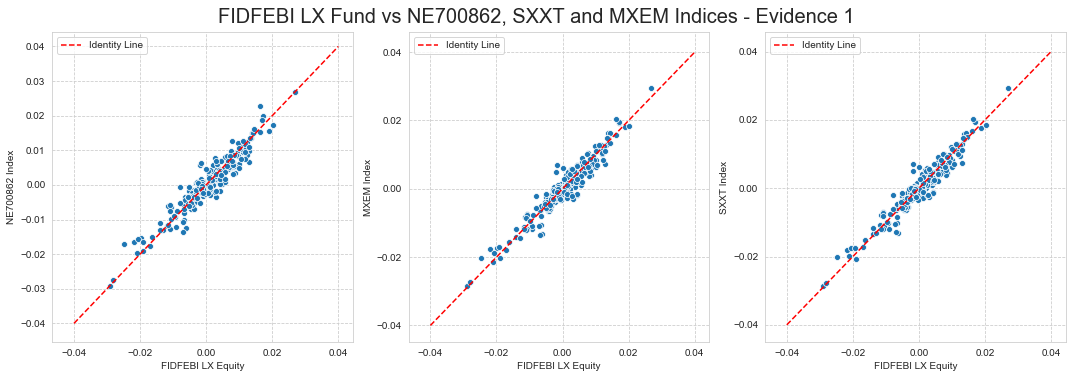

In [63]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
X_plot = np.linspace(-0.04,0.04,100)
Y_plot = X_plot



ax=axs.ravel()
sns.scatterplot(x="FIDFEBI LX Equity", y="NE700862 Index", data=test_passive, ax=ax[0]);
ax[0].plot(X_plot, Y_plot, color='r', ls='--', label='Identity Line')
ax[0].legend()
sns.scatterplot(x='FIDFEBI LX Equity',y='MXEM Index', data=test_passive, ax=ax[1]);
ax[1].plot(X_plot, Y_plot, color='r', ls='--', label='Identity Line')
ax[1].legend()

sns.scatterplot(x='FIDFEBI LX Equity',y='SXXT Index', data=test_passive, ax=ax[2], palette=['orange']);
ax[2].plot(X_plot, Y_plot, color='r', ls='--', label='Identity Line')
ax[2].legend()

plt.suptitle('FIDFEBI LX Fund vs NE700862, SXXT and MXEM Indices - Evidence 1', fontsize=20, y=1.04)
plt.tight_layout()

plt.savefig('fund2_analysis0.png',dpi=75,bbox_inches='tight')

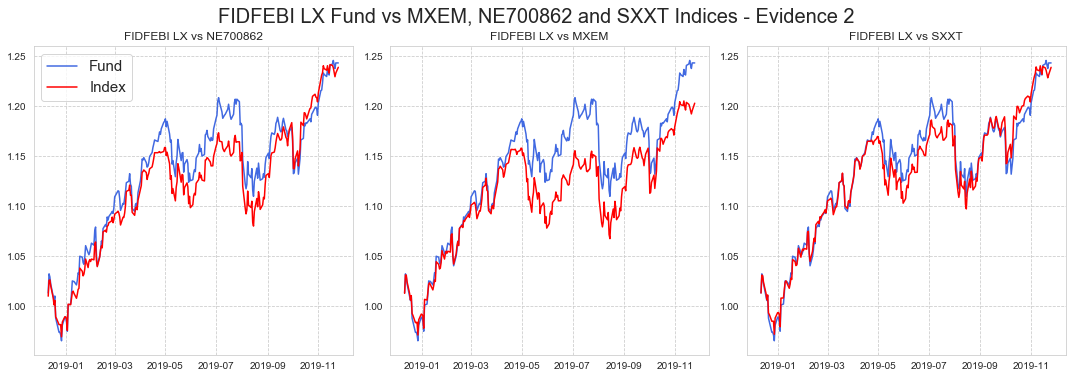

In [75]:
test_passive_cum = (test_passive+1).cumprod()
fig, axs = plt.subplots(1,3,figsize=(15,5))
ax=axs.ravel()

ax[0].plot(test_passive_cum.loc[:,"FIDFEBI LX Equity"],color='royalblue',label='Fund')
ax[0].plot(test_passive_cum.loc[:,'NE700862 Index'],color='r',label='Index')
ax[0].legend(fontsize=15)
ax[0].set_title('FIDFEBI LX vs NE700862')

ax[1].plot(test_passive_cum.loc[:,'FIDFEBI LX Equity'],color='royalblue',label='Fund')
ax[1].plot(test_passive_cum.loc[:,'MXEM Index'],color='r',label='Index')
ax[1].set_title('FIDFEBI LX vs MXEM')

ax[2].plot(test_passive_cum.loc[:,'FIDFEBI LX Equity'],color='royalblue',label='Fund')
ax[2].plot(test_passive_cum.loc[:,'SXXT Index'],color='r',label='Index')
ax[2].set_title('FIDFEBI LX vs SXXT')

plt.suptitle('FIDFEBI LX Fund vs MXEM, NE700862 and SXXT Indices - Evidence 2', fontsize=20, y=1.04)

plt.tight_layout()
plt.savefig('fund2_analysis1.png',dpi=75,bbox_inches='tight');

#### Regression Check:

In [65]:
# Create features and implement regression against the first Index
X_r = test_passive.loc[:,'NE700862 Index'].values
Y = test_passive.loc[:,'FIDFEBI LX Equity'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()

print(results.summary())

# Create features and implement regression against the Second Index
X_r = test_passive.loc[:,'MXEM Index'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()

print(results.summary())

# Create features and implement regression against the third Index
X_r = test_passive.loc[:,'SXXT Index'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2206.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.98e-125
Time:                        18:32:53   Log-Likelihood:                 1133.3
No. Observations:                 250   AIC:                            -2263.
Df Residuals:                     248   BIC:                            -2256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.659e-05      0.000      0.100      0.9

### Potential Tracker n.3: UBSEITL LX

This is a Luxembourg domiciled fund. According to the Fund's KIID: "__The investment fund invests primarily in the shares of Eurozone companies. The portfolio is focused primarily on securities from large companies, though it is strategically supplemented by securities from small and medium-sized companies. Working on the basis of well-grounded analyses by our local investment specialists, the fund manager combines carefully selected equities of various companies from various countries and sectors with the objective of exploiting interesting return opportunities while keeping the level of risk under control.__" ([link](https://www.morningstar.co.uk/uk/funds/snapshot/snapshot.aspx?id=F0GBR04AOD&tab=14&DocumentId=0298eb1b19df8cd9ff05c9db3882a7c2&Format=PDF)).  The running management fees are 1.87\%, according to Bloomberg. The document does not specify if the fund is active or passive. However, the KIID's description is more consistent with an actively managed fund. The analysis suggest that this fund might be classified as a closet tracker against two indices: the S\&P Euro Plus and the NDDLE15. As initial pieces of evidence, a graphical comparison of the funds daily and cumulated returns are analyzed (Figure below).

The graphs related to the cumulated performances show again the attributes highlighted when analyzing the FIDFEBI LX fund against the MXEM Index. Despite all the main behavioural metrics suggesting that the fund UBSEITL LX might passively track the NDDLE15 and the S\&P Euro Plus indices, the performances between the fund and the indices over the last year are quite different. For instance, against the S\&P Euro Plus the fund under-performs by about 7.5\%, while versus the NDDLE15 the under performance is the range of 5\%. Equally important, the two under-performances are gradually accumulated over the year, and not due to one-off effect. What seems to emerge here is a __shortcoming of the metrics used in the analysis__. This topic is going to be discussed in the next and final paragraph.

In [66]:
df_results_1y.loc[cluster_passive_funds_highfees.iloc[5,0],:]

beta              0.0311202
R2                 0.892237
TEV                0.249935
Type                   Fund
Fees                   1.87
Benchmark Kind            1
Name: Fund:UBSEITL LX Equity, Index:S&P_EURO_PLUS, dtype: object

In [67]:
df_results_1y.loc[cluster_passive_funds_highfees.iloc[6,0],:]

beta              0.00480716
R2                  0.874488
TEV                  0.26861
Type                    Fund
Fees                    1.87
Benchmark Kind             1
Name: Fund:UBSEITL LX Equity, Index:NDDLE15 Index, dtype: object

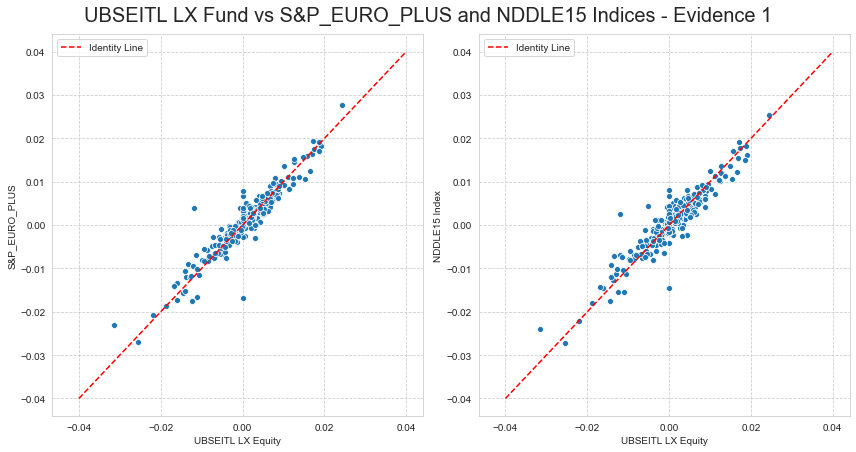

In [68]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
X_plot = np.linspace(-0.04,0.04,100)
Y_plot = X_plot



ax=axs.ravel()
sns.scatterplot(x="UBSEITL LX Equity", y="S&P_EURO_PLUS", data=test_passive, ax=ax[0]);
ax[0].plot(X_plot, Y_plot, color='r', ls='--', label='Identity Line')
ax[0].legend()
sns.scatterplot(x='UBSEITL LX Equity',y='NDDLE15 Index', data=test_passive, ax=ax[1]);
ax[1].plot(X_plot, Y_plot, color='r', ls='--', label='Identity Line')
ax[1].legend()

plt.suptitle('UBSEITL LX Fund vs S&P_EURO_PLUS and NDDLE15 Indices - Evidence 1', fontsize=20, y=1.04)
plt.tight_layout()

plt.savefig('fund3_analysis0.png',dpi=75,bbox_inches='tight')

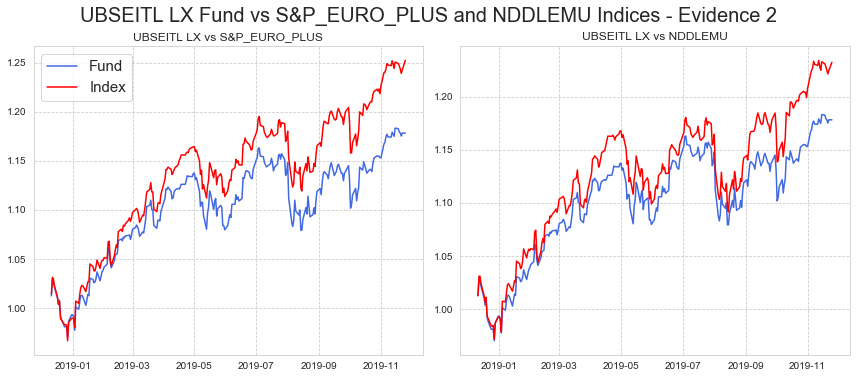

In [69]:
test_passive_cum = (test_passive+1).cumprod()
fig, axs = plt.subplots(1,2,figsize=(12,5))
ax=axs.ravel()

ax[0].plot(test_passive_cum.loc[:,'UBSEITL LX Equity'],color='royalblue',label='Fund')
ax[0].plot(test_passive_cum.loc[:,'S&P_EURO_PLUS'],color='r',label='Index')
ax[0].legend(fontsize=15)
ax[0].set_title('UBSEITL LX vs S&P_EURO_PLUS')
ax[1].plot(test_passive_cum.loc[:,'UBSEITL LX Equity'],color='royalblue',label='Fund')
ax[1].plot(test_passive_cum.loc[:,'NDDLEMU Index'],color='r',label='Index')
ax[1].set_title('UBSEITL LX vs NDDLEMU')
plt.suptitle('UBSEITL LX Fund vs S&P_EURO_PLUS and NDDLEMU Indices - Evidence 2', fontsize=20, y=1.04)

plt.tight_layout()
plt.savefig('fund3_analysis1.png',dpi=75,bbox_inches='tight');

#### Regression Check:

In [70]:
# Create features and implement regression against the first Index
X_r = test_passive.loc[:,'S&P_EURO_PLUS'].values
Y = test_passive.loc[:,'AEEI2EC LX Equity'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()

print(results.summary())
# Create features and implement regression against the Second Index
X_r = test_passive.loc[:,'NDDLEMU Index'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1615.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.36e-110
Time:                        18:33:02   Log-Likelihood:                 1090.5
No. Observations:                 250   AIC:                            -2177.
Df Residuals:                     248   BIC:                            -2170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.749      0.4

### 9. Conclusions:

In this paper a procedure for identifying closet tracker funds has been developed and tested. This critical element of this procedure is an unsupervised machine learning clustering algorithm that tackles the goal of clustering a set of funds according to their management style. A control group of known passive funds (ETFs) has been added to the set of funds, and this trick should allow to single out the broader group of potential closet tracker once the funds are clustered. A Gaussian Mixture model delivers the most promising results in terms of funds clustering according to their management styles. Most of the funds from the control group are grouped in the same cluster as expected. However, by merely comparing the performances of three potential closet tracker against their candidate indices, a severe shortcoming in the metrics used to summarize funds' style has emerged. __The metrics used to outline the funds' investment approach seems to not take in due account the positive or negative alpha generated in the funds.__
Significant over or under-performances can be accumulated over the period under review without being adequately captured by the statistics used in the analysis (Beta, TEV and R2). This paper offers some evidence in favour of the opportunity to integrate them with additional metrics to better describe a fund's behaviour. Since these are the very metrics used by the Irish regulator to oversight investment funds, it should evaluate the possibility to add additional metrics relying on the experience from other countries or supranational entities such as the ESMA. For instance, the latter included in its study also the active equity component for each fund against its benchmark, while the Danish regulator used the asset turnover. It must be stressed that the procedure outlined in this paper and its underlying logic remain valid and are not affected by the set of metrics selected. On the contrary, the increase in the amount and quality of the data is very likely to increase the reliability of the output.  
To provide a measure of the information that are not captured by the current metrics, they have been applied on a simulated fund and its benchmark. This fund shows a beta of 0.998, a R2 of 0.94 and a TEV of 0.003 (See data below) against the synthetic benchmark. All the metrics would qualify this fund as a closet tracker of the index. However, the fund manages to outperform the index by more than 10\% contradicting the preceding statement. __When a fund has a sizeable part of its performances driven by a component that is unrelated to the market directions, these three metrics alone fail.__

In [71]:
# Create the simulated series of a fund and an index where the fund has a random daily alpha equal to 5bps:
np.random.seed(17)
mu, sigma = 0, 0.01 # mean and standard deviation
s = np.random.normal(mu, sigma, 250)
q = s + 0.0005*np.random.normal(1, 5, 250) + np.random.normal(0, 0.0001, 250)

In [72]:
# Create a dataframe with the two series :

test_df = pd.DataFrame(columns=['Index A','Fund B'])
test_df['Index A']=s
test_df['Fund B']=q

# Compute the fund and index in levels:
test_df_cum = (test_df+1).cumprod()

# Make regression on the daily returns:
X_r = test_df.loc[:,'Index A'].values
Y = test_df.loc[:,'Fund B'].values
X_r = sm.add_constant(X_r)
model = sm.OLS(Y,X_r)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     4417.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          4.94e-160
Time:                        18:33:02   Log-Likelihood:                 1147.4
No. Observations:                 250   AIC:                            -2291.
Df Residuals:                     248   BIC:                            -2284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.881      0.0

In [73]:
# Coumpute the TEV:
TEV = np.std(test_df['Index A']-test_df['Fund B'])*100
TEV

0.24579614746841166

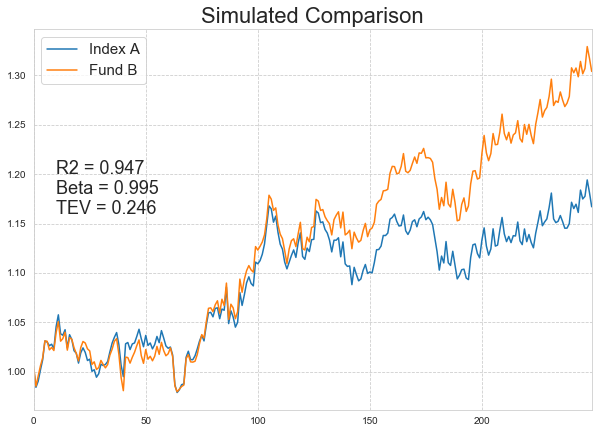

In [74]:
# Plot the two series with a box summurizing the results:
fig, ax = plt.subplots(figsize=(10,7))
test_df_cum.plot(ax=ax)
ax.set_title('Simulated Comparison', fontsize=22)
ax.text(10,1.2,'R2 = {:.3f}'.format(results.rsquared), fontsize=18)
ax.text(10,1.18,'Beta = {:.3f}'.format(results.params[1]), fontsize=18)
ax.text(10,1.16,'TEV = {:.3f}'.format(TEV), fontsize=18)
ax.legend(fontsize=15);